# **Walmart**

**Sam Walton started Walmart, a retail behemoth and one of the biggest and most powerful corporations in the world**, in 1962. With its headquarters located in Bentonville, Arkansas, this international firm based in the United States has become a major player in the retail sector worldwide. Under a variety of brand names, Walmart runs an extensive network of hypermarkets, cheap department shops, and grocery stores in the US and many other nations.

Walmart, well-known for its "Everyday Low Prices" approach, has completely changed the retail market by pledging to provide a large selection of goods at competitive costs. The company's vast supply chain and effective distribution methods have significantly influenced consumer expectations and purchasing behaviors. Walmart has expanded its business beyond retail to include e-commerce.

# **Objective**

The aim of this research is to provide a thorough analysis of consumer purchasing behavior during Walmart Inc.'s Black Friday sales event, with an emphasis on purchase quantities and customer gender. The goal of this study is to offer insightful information that will help Walmart Inc.'s management team make data-driven choices.

# **Features of Dataset**

Feature	Description

User_ID - User ID of the Customer

Product ID - Product ID of the Purchased Product

Gender -	Gender of the Customer (Male/Female)

Age -	Age of the Customer (in bins)

Occupation -	Occupation of the Customer (Masked)

City_Category -	Category of the City (A,B,C)

StayInCurrentCityYears -	Number of years stay in current city

Marital_Status -	Marital Status (Married/Unmarried)

ProductCategory -	Product Category (Masked)

Purchase -	Purchase Amount

# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# **Importing Dataset**

In [ ]:
walmart_data = pd.read_csv('walmart_data.csv')

# **Data analysis like checking the structure & characteristics of the dataset**

In [ ]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


# **Check for the missing values and find the number of missing values in each column**

In [ ]:
walmart_data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
walmart_data.duplicated().value_counts()  ###There are no duplicate entries in the dataset.

False    550068
Name: count, dtype: int64

# **Replacing the values in marital_status column**

In [ ]:
walmart_data['Marital_Status'] = walmart_data['Marital_Status'].replace({0:'Unmarried',1:'Married'})
walmart_data['Marital_Status'].unique()

array(['Unmarried', 'Married'], dtype=object)

In [ ]:
# conversion of categorical attributes to 'category'
column=["User_ID","Occupation","Marital_Status","Product_Category"]
walmart_data[column]=walmart_data[column].astype("object")

In [ ]:
walmart_data.head()

User_ID Product_ID Gender   Age Occupation City_Category  \
0  1000001  P00069042      F  0-17         10             A   
1  1000001  P00248942      F  0-17         10             A   
2  1000001  P00087842      F  0-17         10             A   
3  1000001  P00085442      F  0-17         10             A   
4  1000002  P00285442      M   55+         16             C   

  Stay_In_Current_City_Years Marital_Status Product_Category  Purchase  
0                          2      Unmarried                3      8370  
1                          2      Unmarried                1     15200  
2                          2      Unmarried               12      1422  
3                          2      Unmarried               12      1057  
4                         4+      Unmarried                8      7969

# **Checking the unique values for columns**


In [ ]:
for i in walmart_data.columns:
    print(f'Unique Values in {i} column are :-\n {walmart_data[i].unique()}\n')
    print('.'*60)

Unique Values in User_ID column are :-
 [1000001 1000002 1000003 ... 1004113 1005391 1001529]

............................................................
Unique Values in Product_ID column are :-
 ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']

............................................................
Unique Values in Gender column are :-
 ['F' 'M']

............................................................
Unique Values in Age column are :-
 ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

............................................................
Unique Values in Occupation column are :-
 [10 16 15 7 20 9 1 12 17 0 3 4 11 8 19 2 18 5 14 13 6]

............................................................
Unique Values in City_Category column are :-
 ['A' 'C' 'B']

............................................................
Unique Values in Stay_In_Current_City_Years column are :-
 ['2' '4+' '3' '1' '0']

...............................

In [ ]:
for i in walmart_data.columns:
    print('Number of Unique Values in',i,'column :', walmart_data[i].nunique())
    print('-'*60)

Number of Unique Values in User_ID column : 5891
------------------------------------------------------------
Number of Unique Values in Product_ID column : 3631
------------------------------------------------------------
Number of Unique Values in Gender column : 2
------------------------------------------------------------
Number of Unique Values in Age column : 7
------------------------------------------------------------
Number of Unique Values in Occupation column : 21
------------------------------------------------------------
Number of Unique Values in City_Category column : 3
------------------------------------------------------------
Number of Unique Values in Stay_In_Current_City_Years column : 5
------------------------------------------------------------
Number of Unique Values in Marital_Status column : 2
------------------------------------------------------------
Number of Unique Values in Product_Category column : 20
------------------------------------------------

In [ ]:
walmart_data.describe()

Purchase
count  550068.000000
mean     9263.968713
std      5023.065394
min        12.000000
25%      5823.000000
50%      8047.000000
75%     12054.000000
max     23961.000000

## **Insights**
Unique User IDs: Each user has a special identification number (like a code) to tell them apart. There are a total of 550,068 users in this dataset.

Job Titles: This data tells you what kind of jobs the users have. It uses numbers (0 to 20) to represent different occupations.

Product Types: This data shows the categories of products users bought (e.g., clothing, electronics). Numbers (1 to 20) represent different categories.

Purchase Amounts: This data shows how much each user spent. The amounts range from 12 dollars to 23,961 dollars.

# **Detect Outliers**

In [ ]:
continuous_var = ['Purchase']
arr = {'5th percentile': 5, '25th percentile or Q1': 25, '50th percentile or Q2': 50, '75th percentile or Q3': 75,
       '95th percentile': 95}

In [ ]:
for key, value in arr.items():
    for var in continuous_var:
        print(f'{var} -> {key} : {np.percentile(walmart_data[var], value):.2f}')

Purchase -> 5th percentile : 1984.00
Purchase -> 25th percentile or Q1 : 5823.00
Purchase -> 50th percentile or Q2 : 8047.00
Purchase -> 75th percentile or Q3 : 12054.00
Purchase -> 95th percentile : 19336.00


IQR for Purchase: 6231.0
Outlier above this Q3 Purchase : 21400.5
Percentage of outliers for Purchase: 0.49% 



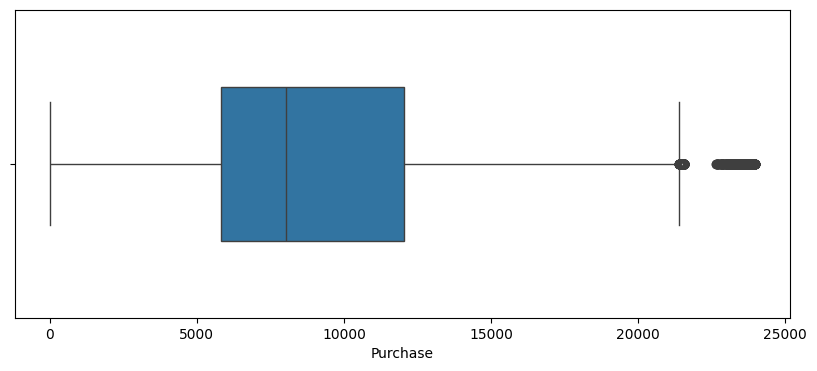

In [ ]:
for var in continuous_var:
    # Calculate the IQR for the variable
    Q1 = np.percentile(walmart_data[var], arr['25th percentile or Q1'])
    Q3 = np.percentile(walmart_data[var], arr['75th percentile or Q3'])
    percentile_95 = np.percentile(walmart_data[var], arr['95th percentile'])
    IQR = Q3 - Q1

    # Define the outlier thresholds
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Find the outliers for the variable
    outliers = walmart_data[(walmart_data[var] < lower_threshold) | (walmart_data[var] > upper_threshold)]

    # Calculate the percentage of outliers
    outlier_percentage = round(len(outliers) / len(walmart_data[var]) * 100, 2 )

    # Output the percentage of outliers
    print(f"IQR for {var}: {IQR}")
    print(f"Outlier above this Q3 {var} : {upper_threshold}")
    print(f"Percentage of outliers for {var}: {outlier_percentage}% \n")

plt.figure(figsize=(10, 4))

# Box Plot for Purchase
sns.boxplot(x=walmart_data['Purchase'], patch_artist=True, widths=0.5)

plt.show()

# **Non-Graphical Analysis:**

### **Description of columns with 'object' datatype**

In [ ]:
walmart_data.describe(include = 'object')

User_ID Product_ID  Gender     Age  Occupation City_Category  \
count    550068     550068  550068  550068      550068        550068   
unique     5891       3631       2       7          21             3   
top     1001680  P00265242       M   26-35           4             B   
freq       1026       1880  414259  219587       72308        231173   

       Stay_In_Current_City_Years Marital_Status  Product_Category  
count                      550068         550068            550068  
unique                          5              2                20  
top                             1      Unmarried                 5  
freq                       193821         324731            150933

## **Insights**
Lots of Products: There are 3,631 different products (unique Product IDs) listed in the data.

Most Popular Product: The product with the code 'P00265242' seems to be the most popular, showing up 1,880 times.

Two Genders: The data only includes information on two genders, represented by 'M' (most likely Male) and another category that appears less often.

### **value_counts and unique attributes**


In [ ]:
categorical_columns = ['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Marital_Status', 'Product_Category', 'Stay_In_Current_City_Years']

In [ ]:
print(f"Total number of unique customers in dataset are {walmart_data['User_ID'].nunique()}")

Total number of unique customers in dataset are 5891


In [ ]:
np.round(walmart_data['Gender'].value_counts(normalize = True) * 100, 2)

Gender
M    75.31
F    24.69
Name: proportion, dtype: float64

In [ ]:
np.round(walmart_data['Product_Category'].value_counts(normalize=True) *100, 2).cumsum()

Product_Category
5      27.44
1      52.96
8      73.67
11     78.09
2      82.43
6      86.15
3      89.82
4      91.96
16     93.75
15     94.89
13     95.90
10     96.83
12     97.55
7      98.23
18     98.80
20     99.26
19     99.55
14     99.83
17     99.94
9     100.01
Name: proportion, dtype: float64

 82.43% of the total transactions are made for only 5 Product Categories. These are 5, 1, 8, 11 and 2.

In [ ]:
np.round(walmart_data['Stay_In_Current_City_Years'].value_counts(normalize = True) * 100, 2).sort_values(ascending=False)

Stay_In_Current_City_Years
1     35.24
2     18.51
3     17.32
4+    15.40
0     13.53
Name: proportion, dtype: float64

Majority of the transactions (53.75 % of total transactions) are made by the customers having 1 or 2 years of stay in the current city.

In [ ]:
gender_dist = pd.DataFrame(walmart_data.groupby('Gender')['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'})
gender_dist['percent_share'] = np.round(gender_dist['unique_customers'] / gender_dist['unique_customers'].sum() * 100, 2)
gender_dist

Gender  unique_customers  percent_share
0      F              1666          28.28
1      M              4225          71.72

### **Total Revenue generated by Walmart from each Gender**

In [ ]:
total_revenue = pd.DataFrame(walmart_data.groupby('Gender')['Purchase'].sum()).reset_index()
total_revenue['Total Revenue Percentage'] = np.round(total_revenue['Purchase'] / total_revenue['Purchase'].sum() *100,2)
total_revenue

Gender    Purchase  Total Revenue Percentage
0      F  1186232642                     23.28
1      M  3909580100                     76.72

###**Unique customers are there for each Marital Status**

In [ ]:
unique_customers = walmart_data.groupby('Marital_Status')['User_ID'].nunique()
unique_customers

Marital_Status
Married      2474
Unmarried    3417
Name: User_ID, dtype: int64

In [ ]:
#Transactions are made by each Marital Status category
transactions_made = walmart_data.groupby('Marital_Status')['User_ID'].count()
transactions_made

Marital_Status
Married      225337
Unmarried    324731
Name: User_ID, dtype: int64

In [ ]:
#Total Revenue generated by Walmart from each Marital Status
total_revenue = walmart_data.groupby('Marital_Status')['Purchase'].sum()
total_revenue

Marital_Status
Married      2086885295
Unmarried    3008927447
Name: Purchase, dtype: int64

In [ ]:
#Age Distribution
age_dist = walmart_data.groupby(by = ['Age'])['User_ID'].nunique().reset_index().rename(columns = {'User_ID' : 'unique_customers'}).sort_values(by = 'unique_customers', ascending = False)
age_dist['percent_share'] =  np.round(age_dist['unique_customers'] / age_dist['unique_customers'].sum() * 100, 2)
age_dist['cumulative_percent'] =  age_dist['percent_share'].cumsum()
age_dist

Age  unique_customers  percent_share  cumulative_percent
2  26-35              2053          34.85               34.85
3  36-45              1167          19.81               54.66
1  18-25              1069          18.15               72.81
4  46-50               531           9.01               81.82
5  51-55               481           8.16               89.98
6    55+               372           6.31               96.29
0   0-17               218           3.70               99.99

# **Univariate Analysis**

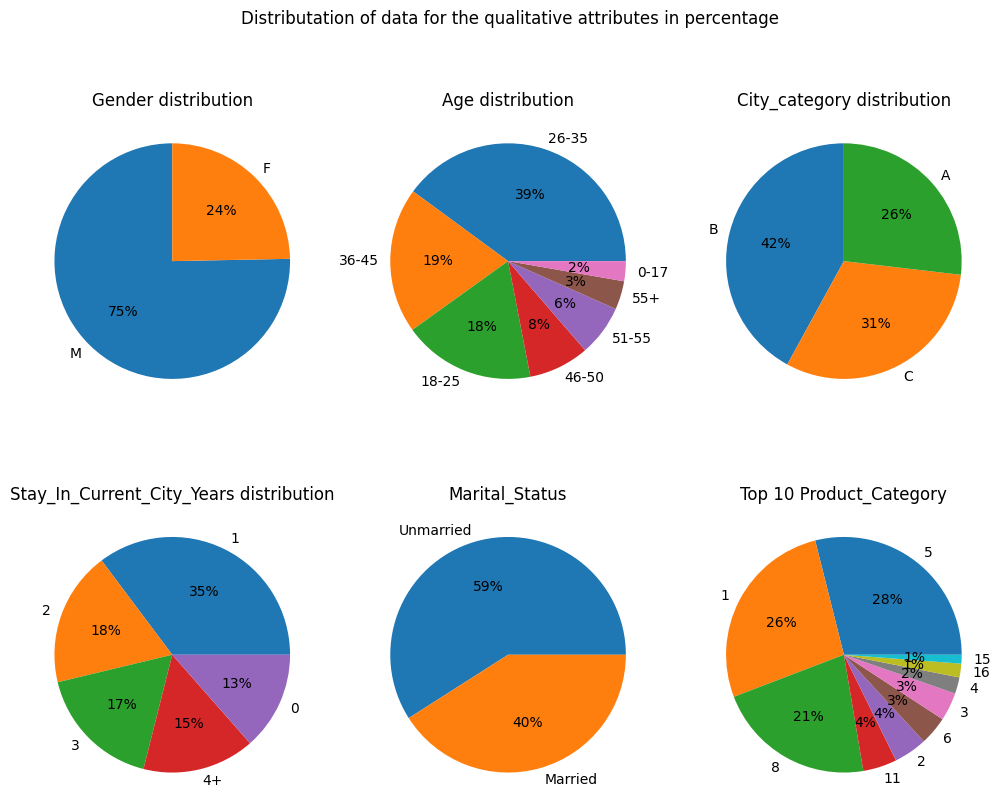

In [ ]:
fig,ax=plt.subplots(2,3,figsize=(10,9))
fig.suptitle("Distributation of data for the qualitative attributes in percentage")
plt.subplot(2,3,1)
data_Gender=walmart_data['Gender'].value_counts(normalize=True)*100
plt.pie(data_Gender, labels=data_Gender.index, autopct='%d%%', startangle=90)
plt.title("Gender distribution")

plt.subplot(2,3,2)
data_Age=walmart_data['Age'].value_counts(normalize=True)*100
plt.pie(data_Age, labels=data_Age.index,autopct='%d%%', startangle=0)
plt.title("Age distribution")

plt.subplot(2,3,3)
data_City_Category=walmart_data['City_Category'].value_counts(normalize=True)*100
plt.pie(data_City_Category, labels=data_City_Category.index, autopct='%d%%', startangle=90)
plt.title("City_category distribution")

plt.subplot(2,3,4)
data_Stay_In_Current_City_Years=walmart_data['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
plt.pie(data_Stay_In_Current_City_Years, labels=data_Stay_In_Current_City_Years.index, autopct='%d%%', startangle=0)
plt.title("Stay_In_Current_City_Years distribution")

plt.subplot(2,3,5)
data_Marital_Status=walmart_data["Marital_Status"].value_counts(normalize=True)*100
plt.pie(data_Marital_Status, labels=data_Marital_Status.index, autopct='%d%%', startangle=0)
plt.title("Marital_Status")

plt.subplot(2,3,6)
data_Product_Category=(walmart_data["Product_Category"].value_counts(normalize=True)*100).sort_values(ascending=False).head(10)

plt.pie(data_Product_Category, labels=data_Product_Category.index, autopct='%d%%', startangle=0)
plt.title("Top 10 Product_Category")

plt.tight_layout()

plt.show()

## **Insights**
Mostly Men: The data shows a higher number of male users compared to females, which might suggest how shopping habits differ between genders.

Young Adults Rule: Users between 26 and 35 years old are the largest group, with a focus on those between 18 and 45.

Top Jobs: Certain job categories (coded as 0, 4, and 7) appear more frequently than others.

City Life: City ‘B’ has the most users, while cities ‘A’ and ‘C’ have a more balanced population.

Settled In: Most users have lived in their current city for over a year, suggesting stability.

Single and Shopping: There are more unmarried users than married users, and they seem to be the primary shoppers.

Popular Products: Product categories 5, 1, and 8 are the most frequently purchased.

# **Bivariate Analysis**

<ipython-input-28-04d75fca8a08>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,2,(3,4))


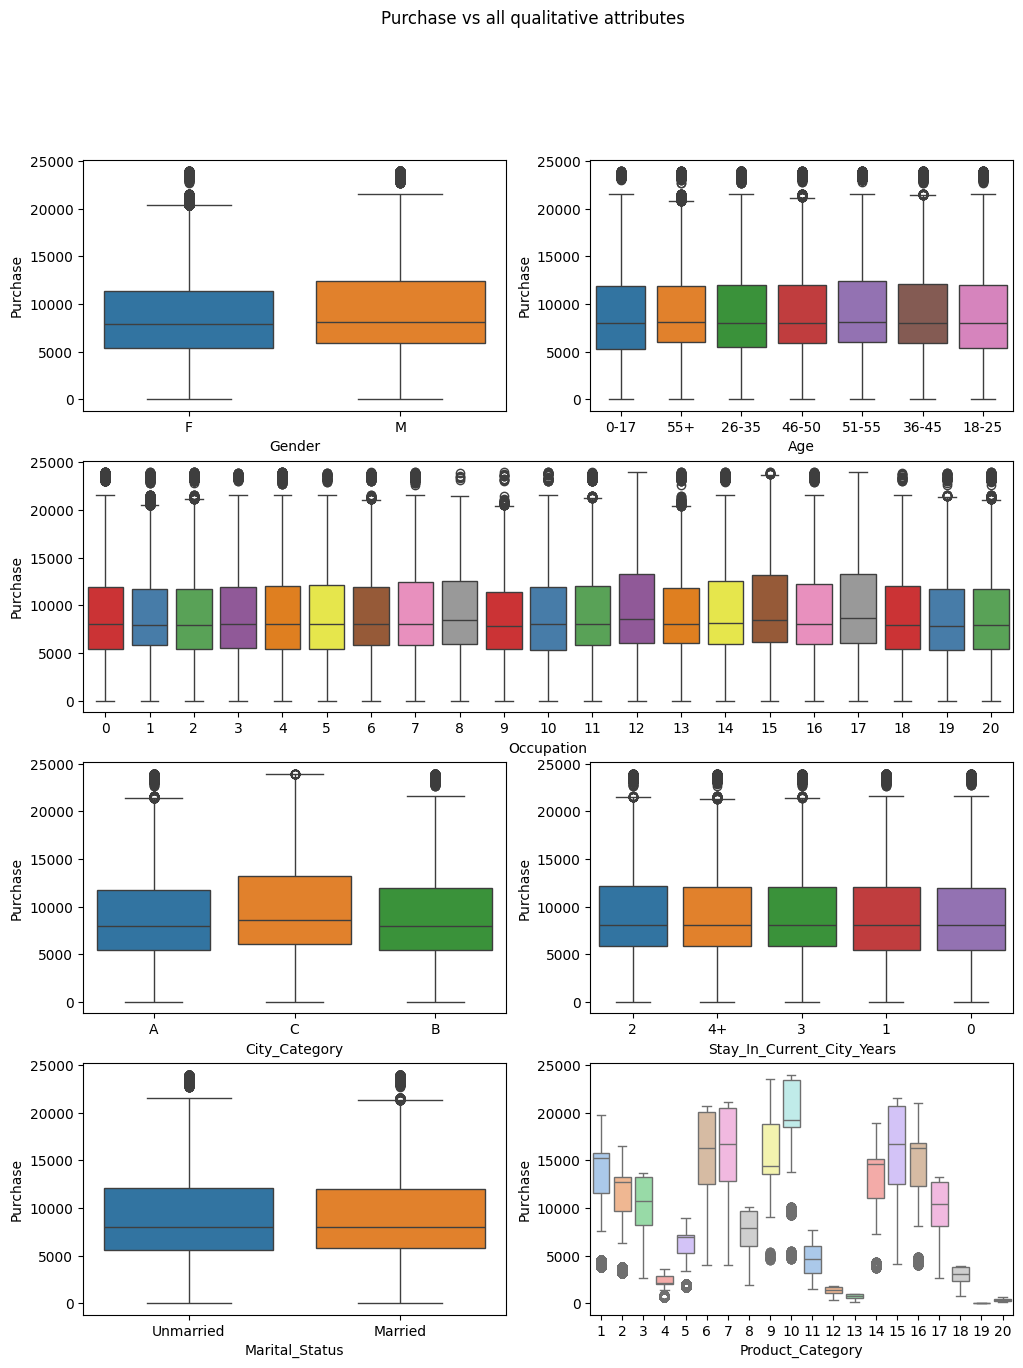

In [ ]:
fig,ax=plt.subplots(4,2,figsize=(12,15))
fig.suptitle("Purchase vs all qualitative attributes")

plt.subplot(4,2,1)
sns.boxplot(data=walmart_data,x="Gender",y="Purchase", hue="Gender", legend=False)
plt.subplot(4,2,2)
sns.boxplot(data=walmart_data,x="Age",y="Purchase", hue="Age", legend=False)
plt.subplot(4,2,(3,4))
sns.boxplot(data=walmart_data,x="Occupation",y="Purchase", hue="Occupation", legend=False, palette='Set1')
plt.subplot(4,2,5)
sns.boxplot(data=walmart_data,x="City_Category",y="Purchase", hue="City_Category", legend=False)
plt.subplot(4,2,6)
sns.boxplot(data=walmart_data,x="Stay_In_Current_City_Years",y="Purchase", hue="Stay_In_Current_City_Years", legend=False)
plt.subplot(4,2,7)
sns.boxplot(data=walmart_data,x="Marital_Status",y="Purchase", hue="Marital_Status", legend=False)
plt.subplot(4,2,8)
sns.boxplot(data=walmart_data,x="Product_Category",y="Purchase", hue="Product_Category", legend=False, palette='pastel')
plt.show()

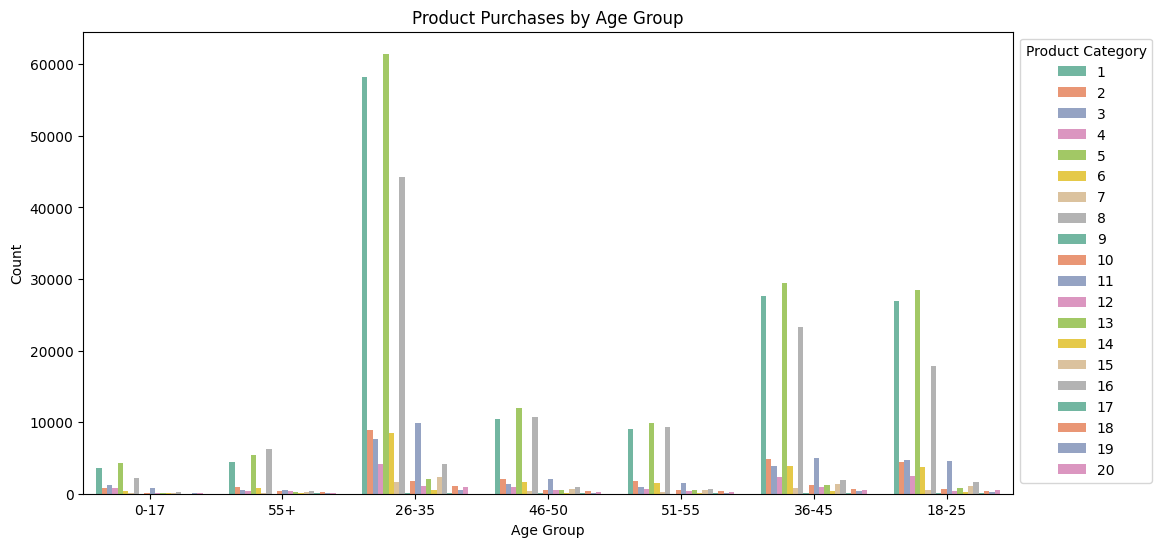

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=walmart_data, x="Age", hue="Product_Category", palette='Set2')
plt.title("Product Purchases by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Product Category", bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

# **Multivariate Analysis**

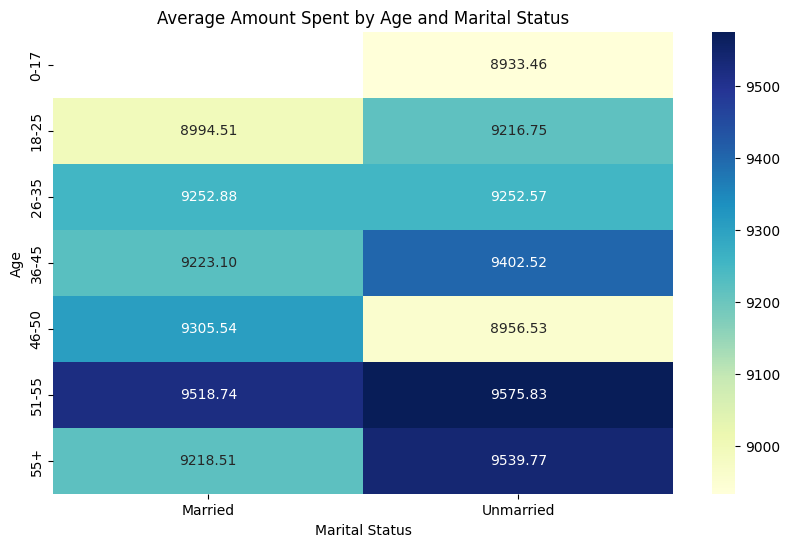

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
pivot_table = walmart_data.pivot_table(index="Age", columns="Marital_Status", values="Purchase", aggfunc="mean")

sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".2f", ax=ax)
ax.set_title("Average Amount Spent by Age and Marital Status")
ax.set_xlabel("Marital Status")
ax.set_ylabel("Age")

plt.show()

## **Insights**
Limited Correlation: The heatmap suggests there's no clear connection between a user's age, marital status, and how much they typically spend. This is because the average spending amounts across different age and marital status groups don't vary significantly.

Further Exploration Needed: While these visualizations suggest a weak relationship, it's important to note this is based on initial observations.

To confirm these findings, consider:
Statistical testing to determine the strength of any relationships.
Exploring additional data points that might influence spending habits.

# **Are women spending more money per transaction than men? Why or Why not?**

In [ ]:
money_spend = walmart_data.groupby('Gender')['Purchase'].agg(['sum','count']).reset_index()

#calculating the amount in billions
money_spend['sum_in_billions'] = round(money_spend['sum'] / 10**9,2)

#calculationg percentage distribution of purchase amount
money_spend['%sum'] = round(money_spend['sum']/money_spend['sum'].sum(),2)

#calculationg per purchase amount
money_spend['per_purchase'] = round(money_spend['sum']/money_spend['count'],2)

#renaming the gender
money_spend['Gender'] = money_spend['Gender'].replace({'F':'Female','M':'Male'})

money_spend

Gender         sum   count  sum_in_billions  %sum  per_purchase
0  Female  1186232642  135809             1.19  0.23       8734.57
1    Male  3909580100  414259             3.91  0.77       9437.53

Text(0.5, 1.0, 'Spending money per transaction')

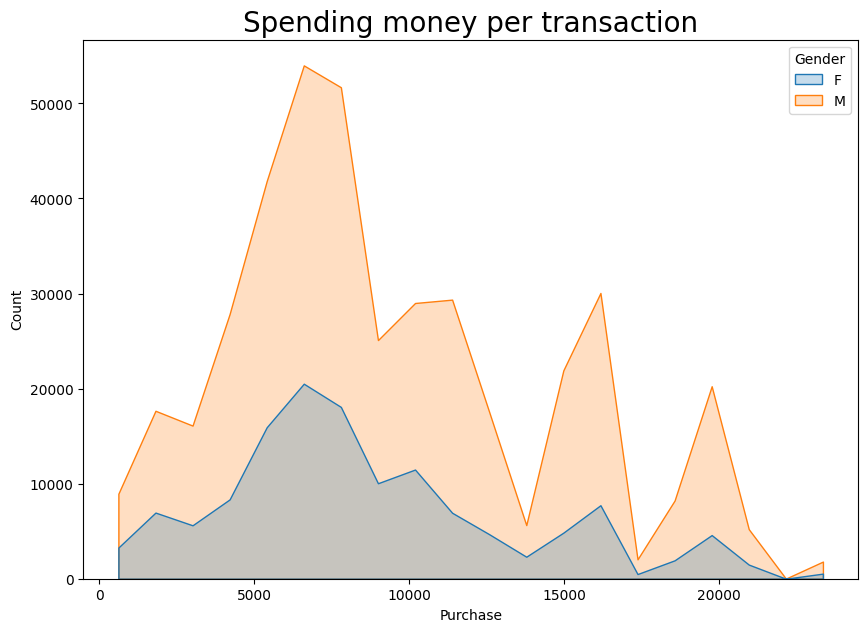

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=walmart_data, x = "Purchase", bins=20, hue = "Gender"
             , element="poly")
plt.title('Spending money per transaction', fontsize=20)

## **Insights**
Higher Spending by Men:

Total Purchases: Men made significantly more purchases and spent a total of more than three times the amount compared to women.
Average Transaction Value: While the average amount spent per transaction is slightly higher for men (9,438) compared to women (8,735), it's important to consider other factors.
Looking Beyond Averages:

Distribution: The way purchase amounts are distributed is not typical (not normally distributed) for both genders. This means relying solely on averages might not give the full picture.

Why the Difference?

Here are some possible reasons why men appear to spend more overall:

More Male Customers: There are many more male customers (414,259) than female customers (135,809) in the data. This can impact averages, as larger groups tend to have more stable (and potentially higher) averages.

Occupation: Different job types have varying gender balances. This can influence spending patterns, as some product categories might be more popular among certain professions (and genders).

Product Choices: In most product categories, men buy more than women. This could indicate men purchase more expensive products or spend more in specific categories.

Potential Income Gap: While not directly reflected in the data, income differences between genders can play a role. If men generally earn more, they might be more comfortable spending more per transaction.

Sample Size Effect: The large difference in the number of male and female customers can affect the average spending calculation. Even small spending differences can lead to variations in the average when dealing with a larger group.

# **Analysing Purchase w.r.t Gender with 90,95 and 99% confidence**

---



In [ ]:
#Male and Female Purchases
walmart_M_purchase = walmart_data[walmart_data.Gender == 'M']['Purchase']
walmart_F_purchase = walmart_data[walmart_data.Gender == 'F']['Purchase']

In [ ]:
sample_list = [1,30, 100, 1000, 10000,100000] # sample sizes
itrn_size = 1000 # how many times random samples of particular size from sample_list should be taken,
conf_level = [90, 95, 99] # confidence levels

In [ ]:
mu_M = np.round(walmart_M_purchase.mean(),2) #population mean Male purchases
sigma_M = np.round(walmart_M_purchase.std(),2) #population standard deviation Male purchases

mu_F = np.round(walmart_F_purchase.mean(),2) #population mean Female purchases
sigma_F = np.round(walmart_F_purchase.std(),2) #population standard deviation Female purchases

print('Population Mean for male and Female Purchases:\n')
print(f'mu_M: {mu_M}, sigma_M: {sigma_M}')
print()
print(f'mu_F: {mu_F}, sigma_F: {sigma_F}')

Population Mean for male and Female Purchases:

mu_M: 9437.53, sigma_M: 5092.19

mu_F: 8734.57, sigma_F: 4767.23


In [ ]:
avg_samples_M = {} # stores all the average values of male purchases for a particular sample_size as key value pairs

# iterating on sample_list and appending each sample list with average of sample_list of purchases for male
for size in sample_list:
    avg_samples_M['sample_M_%s'%size] = []
    for i in range(itrn_size):
        avg_samples_M['sample_M_%s'%size].append(np.random.choice(walmart_M_purchase,size).mean().round(2))
print(avg_samples_M.keys())

avg_samples_F = {} # stores all the average values of female purchases for a particular sample_size as key value pairs

# iterating on sample_list and appending each sample list with average of sample_list of purchases for female
for size in sample_list:
    avg_samples_F['sample_F_%s'%size] = []
    for i in range(itrn_size):
        avg_samples_F['sample_F_%s'%size].append(np.random.choice(walmart_F_purchase,size).mean().round(2))
print(avg_samples_F.keys())

dict_keys(['sample_M_1', 'sample_M_30', 'sample_M_100', 'sample_M_1000', 'sample_M_10000', 'sample_M_100000'])
dict_keys(['sample_F_1', 'sample_F_30', 'sample_F_100', 'sample_F_1000', 'sample_F_10000', 'sample_F_100000'])


In [ ]:
# Calculating X_bar, std, Ci for male customers
x_bar_M = {}
std_M = {}
ci_M = {} # for storing CI for diff samples

for keys,values in avg_samples_M.items():
    x_bar_M[keys]={}
    std_M[keys]= {}
    ci_M[keys]={}

    x_bar = np.mean(values).round(2)
    std = np.std(values).round(2)

    x_bar_M[keys] = x_bar
    std_M[keys] = std

    ci={} # dict for storing CI for diff confidence levels

    for c in conf_level:
        ci[c]={}
        alpha = (1-(c/100))/2
        p_value = 1-alpha
        z_score = norm.ppf(p_value)

        lower_limit = np.round(x_bar - z_score *(std),2)
        upper_limit = np.round(x_bar + z_score *(std),2)

        ci[c].update({'lower_limit': lower_limit,
                      'upper_limit': upper_limit })

    ci_M[keys].update(ci)

print("x_bar_M: ", x_bar_M,'\n')
print("std_M: ", std_M,'\n')
print("ci_M: ", ci_M,'\n')

x_bar_M:  {'sample_M_1': 9360.23, 'sample_M_30': 9465.72, 'sample_M_100': 9435.21, 'sample_M_1000': 9438.61, 'sample_M_10000': 9438.45, 'sample_M_100000': 9437.83} 

std_M:  {'sample_M_1': 5197.94, 'sample_M_30': 953.8, 'sample_M_100': 509.19, 'sample_M_1000': 165.81, 'sample_M_10000': 52.25, 'sample_M_100000': 16.0} 

ci_M:  {'sample_M_1': {90: {'lower_limit': 810.38, 'upper_limit': 17910.08}, 95: {'lower_limit': -827.55, 'upper_limit': 19548.01}, 99: {'lower_limit': -4028.78, 'upper_limit': 22749.24}}, 'sample_M_30': {90: {'lower_limit': 7896.86, 'upper_limit': 11034.58}, 95: {'lower_limit': 7596.31, 'upper_limit': 11335.13}, 99: {'lower_limit': 7008.89, 'upper_limit': 11922.55}}, 'sample_M_100': {90: {'lower_limit': 8597.67, 'upper_limit': 10272.75}, 95: {'lower_limit': 8437.22, 'upper_limit': 10433.2}, 99: {'lower_limit': 8123.62, 'upper_limit': 10746.8}}, 'sample_M_1000': {90: {'lower_limit': 9165.88, 'upper_limit': 9711.34}, 95: {'lower_limit': 9113.63, 'upper_limit': 9763.59}, 9

In [ ]:
# Calculating x-bar, std and CI for female customers
x_bar_F = {}
std_F = {}
ci_F ={}

for keys,values in avg_samples_F.items():
    x_bar_F[keys]= {}
    std_F[keys]= {}
    ci_F[keys]={}

    x_bar = np.mean(values).round(2)
    std = np.std(values).round(2)

    x_bar_F[keys] = x_bar
    std_F[keys] = std

    ci={} # dict for storing CI for diff confidence levels

    for c in conf_level:
        ci[c]={}
        alpha = (1-(c/100))/2
        p_value = 1-alpha
        z_score = norm.ppf(p_value)

        lower_limit = np.round(x_bar - z_score * std ,2)
        upper_limit = np.round(x_bar + z_score * std ,2)
        #print(lower_limit,upper_limit)

        ci[c].update({'lower_limit': lower_limit,
                      'upper_limit': upper_limit })

    ci_F[keys].update(ci)

print("x_bar_F: ", x_bar_F,'\n')
print("std_F: ", std_F,'\n')
print("ci_F: ",  ci_F,'\n')

x_bar_F:  {'sample_F_1': 8615.69, 'sample_F_30': 8769.34, 'sample_F_100': 8747.26, 'sample_F_1000': 8749.59, 'sample_F_10000': 8733.99, 'sample_F_100000': 8734.27} 

std_F:  {'sample_F_1': 4609.68, 'sample_F_30': 863.23, 'sample_F_100': 473.07, 'sample_F_1000': 153.45, 'sample_F_10000': 49.71, 'sample_F_100000': 15.13} 

ci_F:  {'sample_F_1': {90: {'lower_limit': 1033.44, 'upper_limit': 16197.94}, 95: {'lower_limit': -419.12, 'upper_limit': 17650.5}, 99: {'lower_limit': -3258.06, 'upper_limit': 20489.44}}, 'sample_F_30': {90: {'lower_limit': 7349.45, 'upper_limit': 10189.23}, 95: {'lower_limit': 7077.44, 'upper_limit': 10461.24}, 99: {'lower_limit': 6545.81, 'upper_limit': 10992.87}}, 'sample_F_100': {90: {'lower_limit': 7969.13, 'upper_limit': 9525.39}, 95: {'lower_limit': 7820.06, 'upper_limit': 9674.46}, 99: {'lower_limit': 7528.71, 'upper_limit': 9965.81}}, 'sample_F_1000': {90: {'lower_limit': 8497.19, 'upper_limit': 9001.99}, 95: {'lower_limit': 8448.83, 'upper_limit': 9050.35}, 

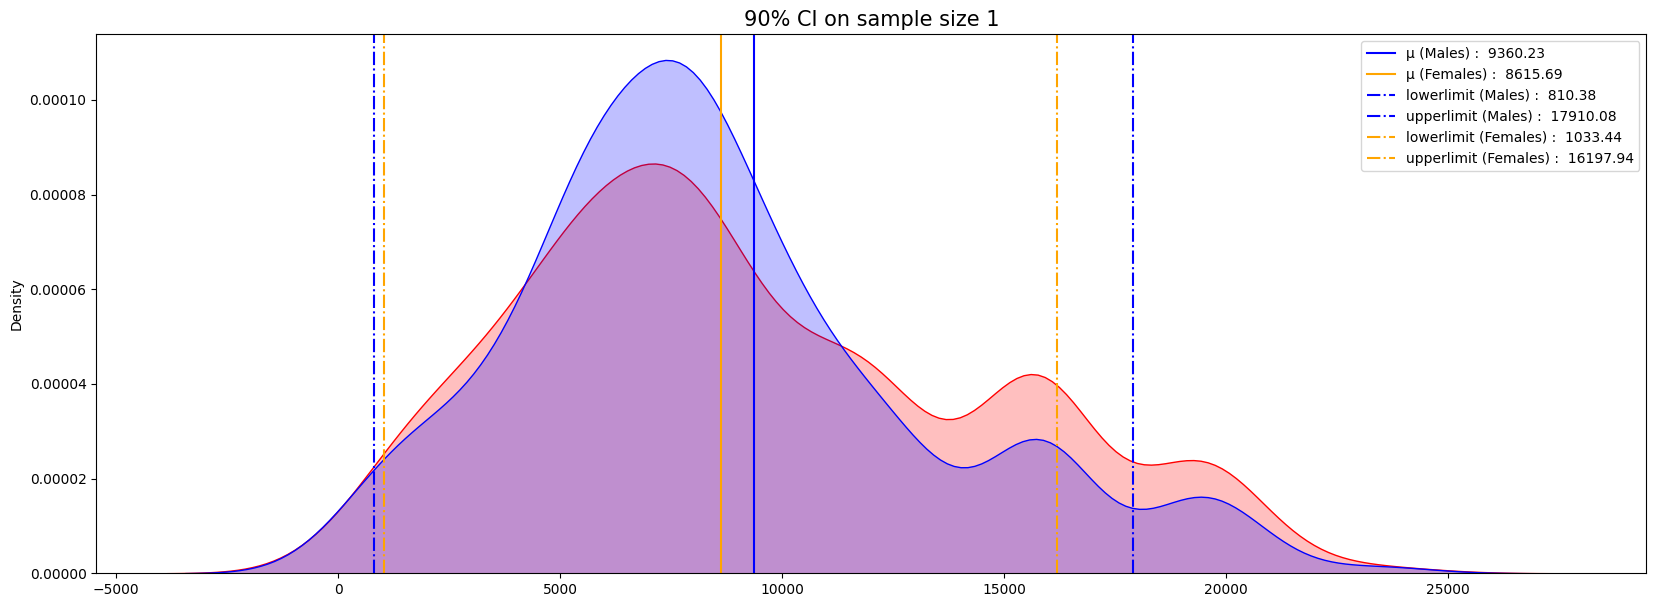

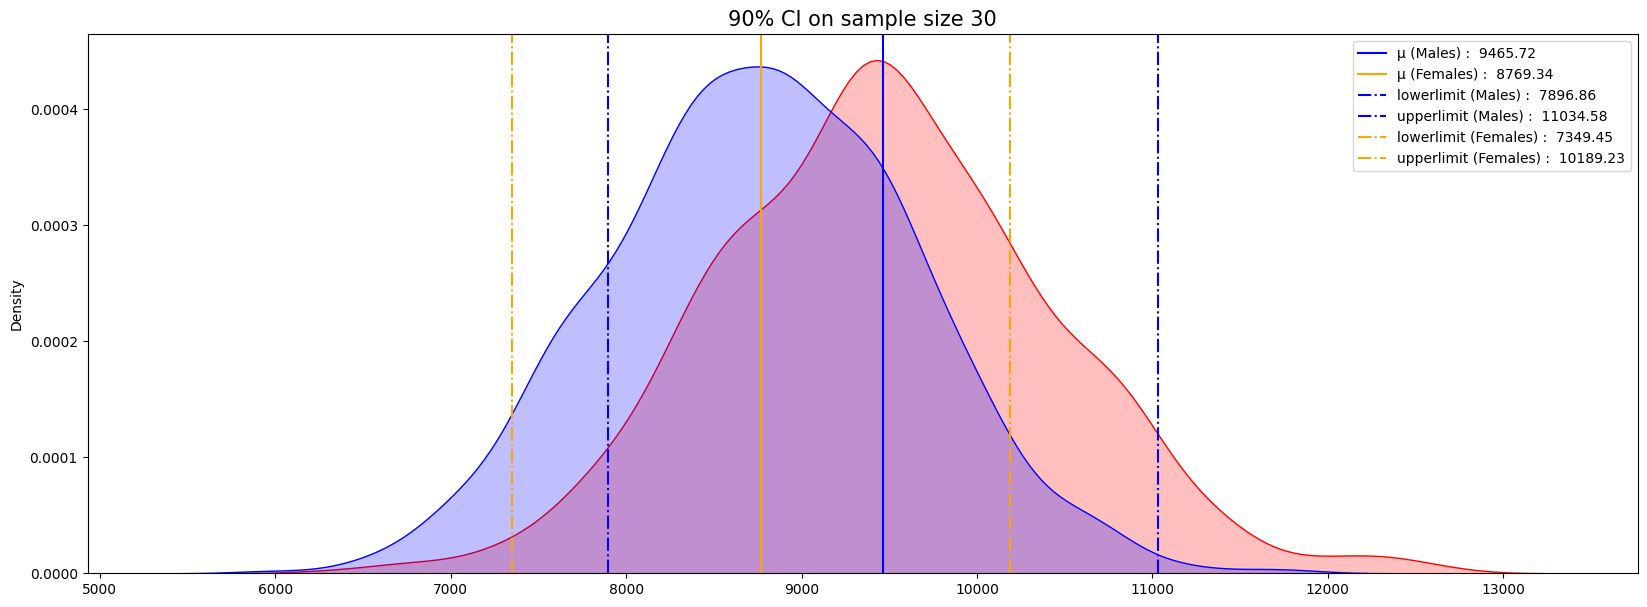

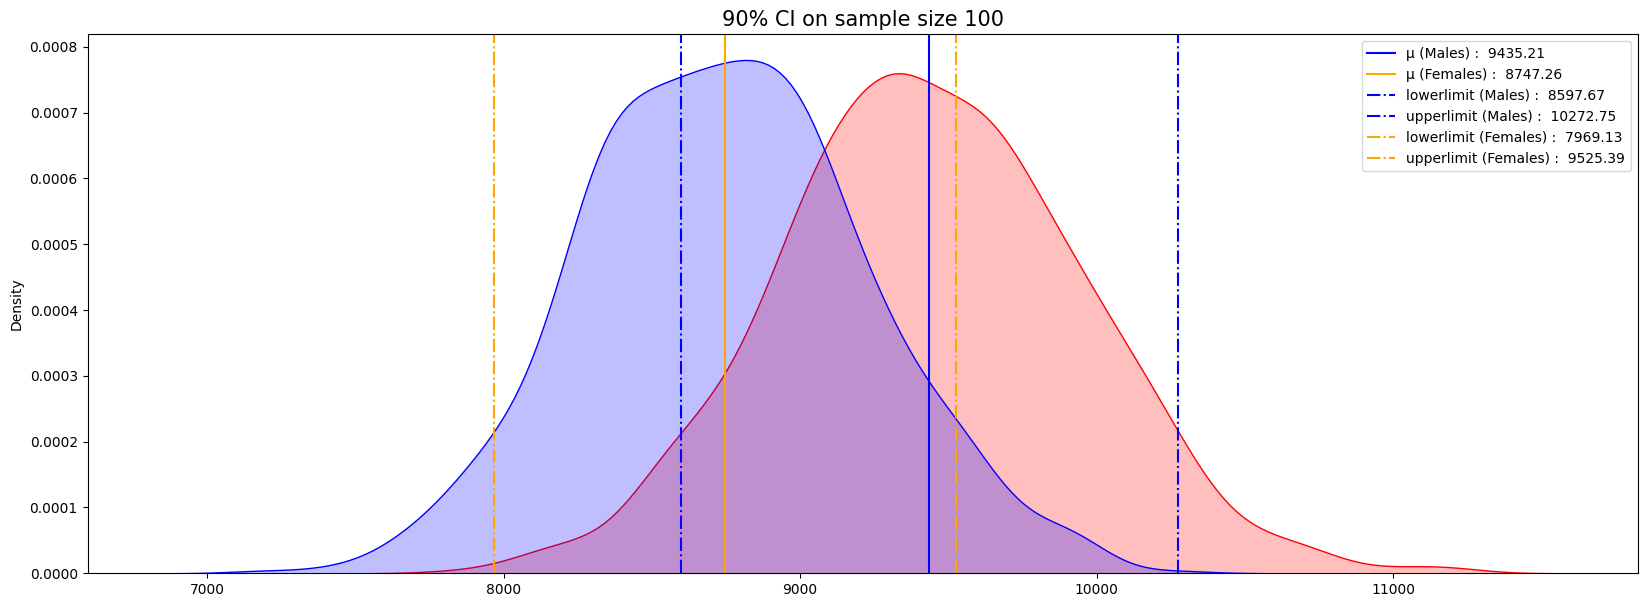

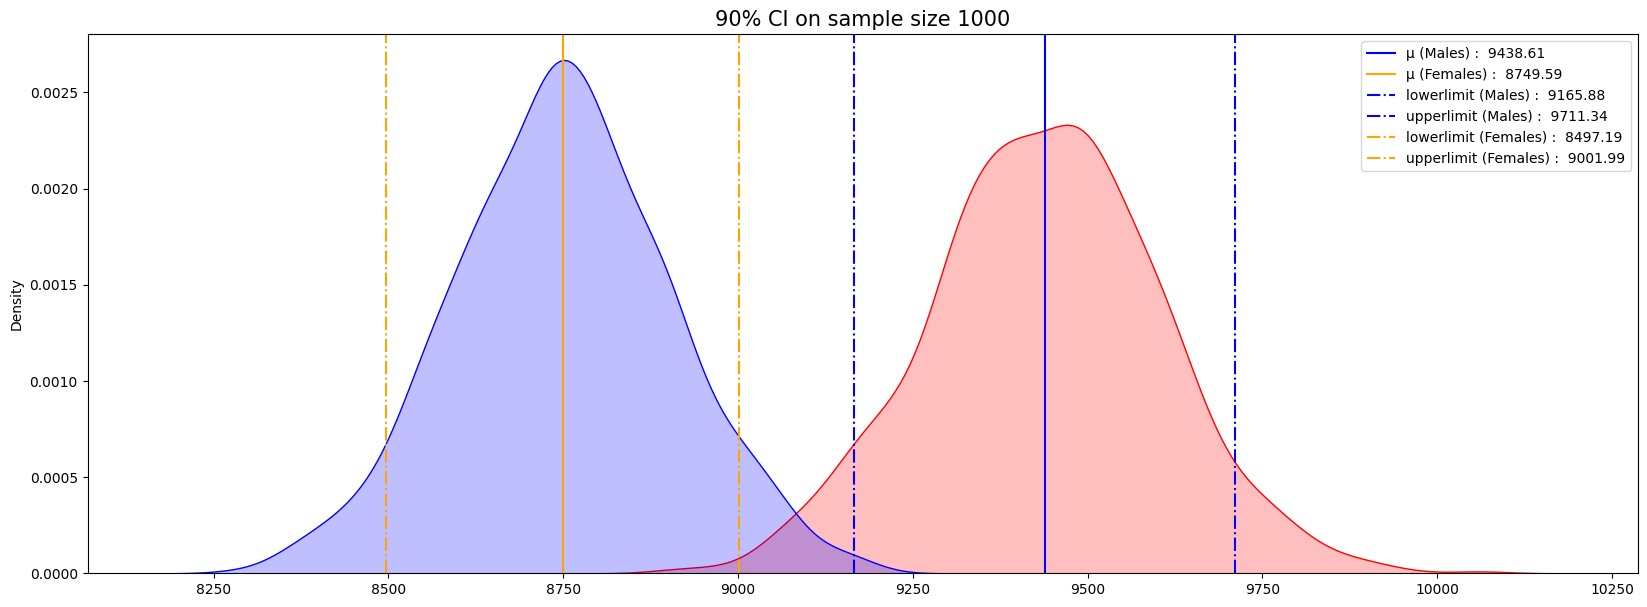

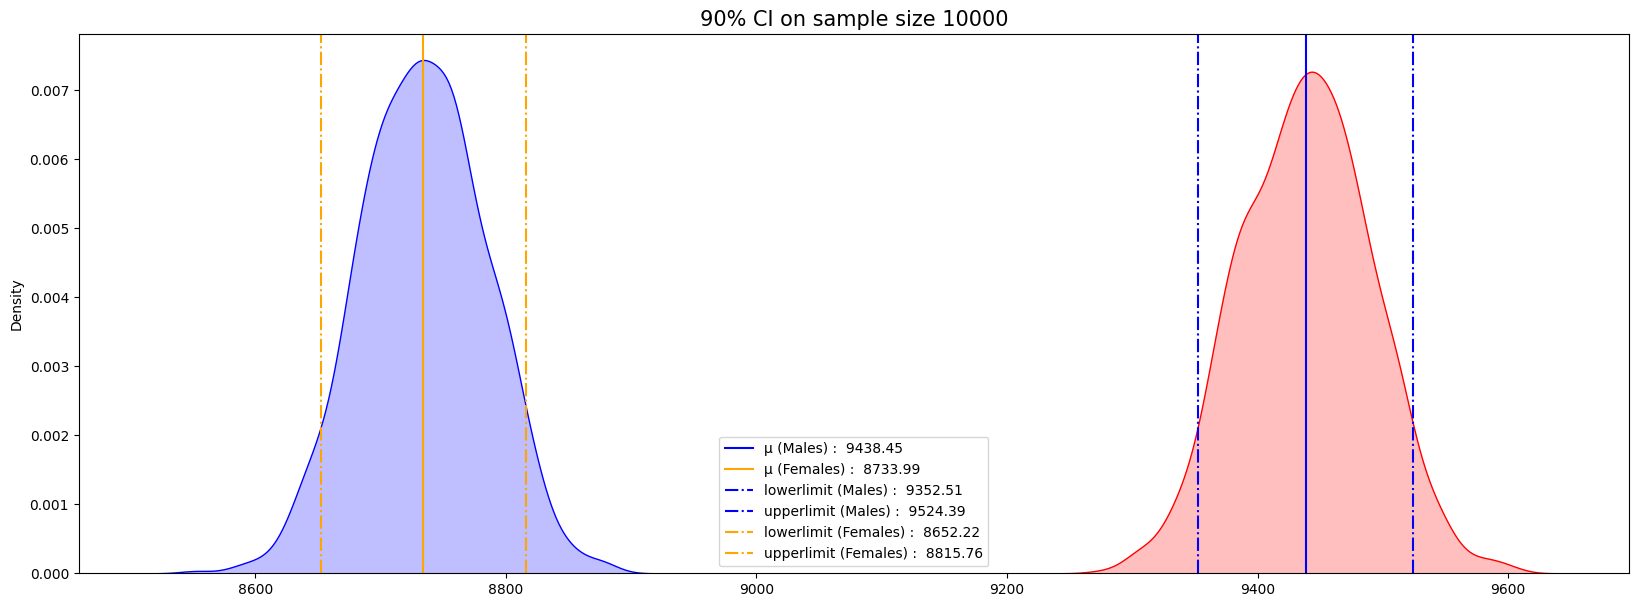

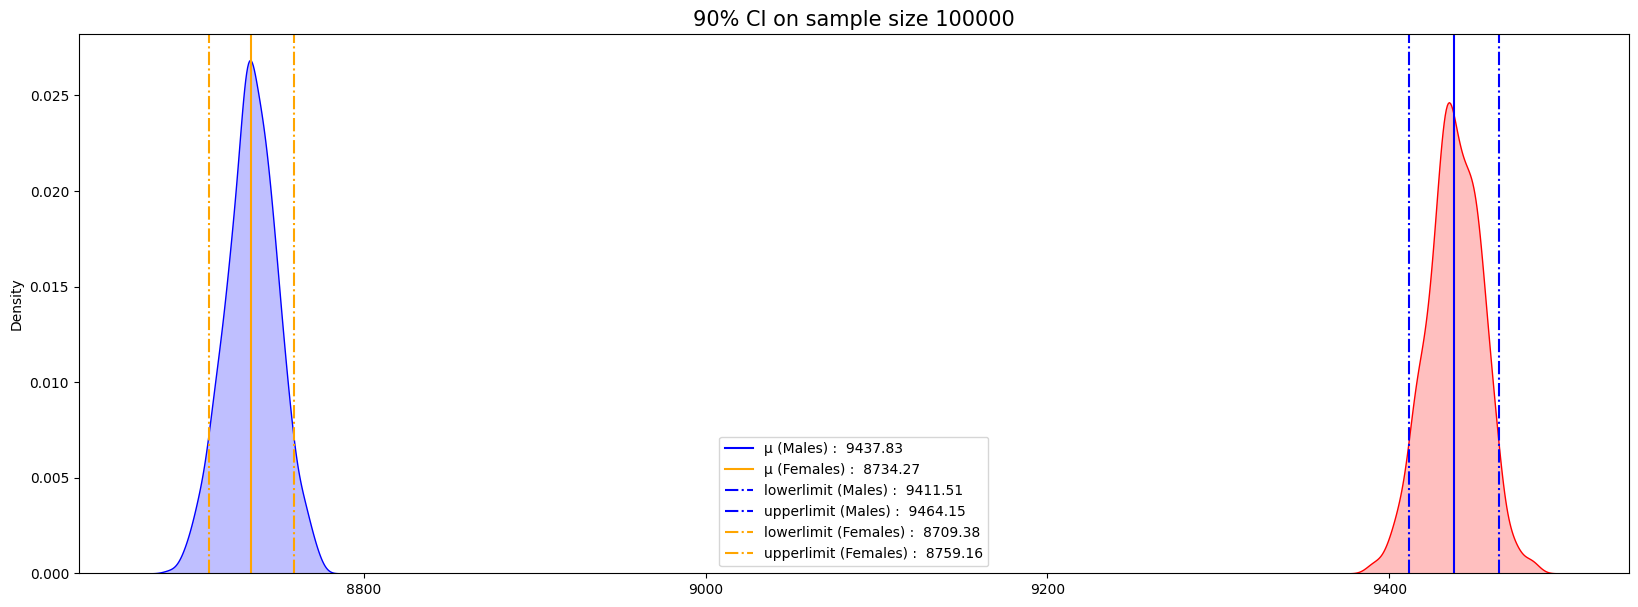

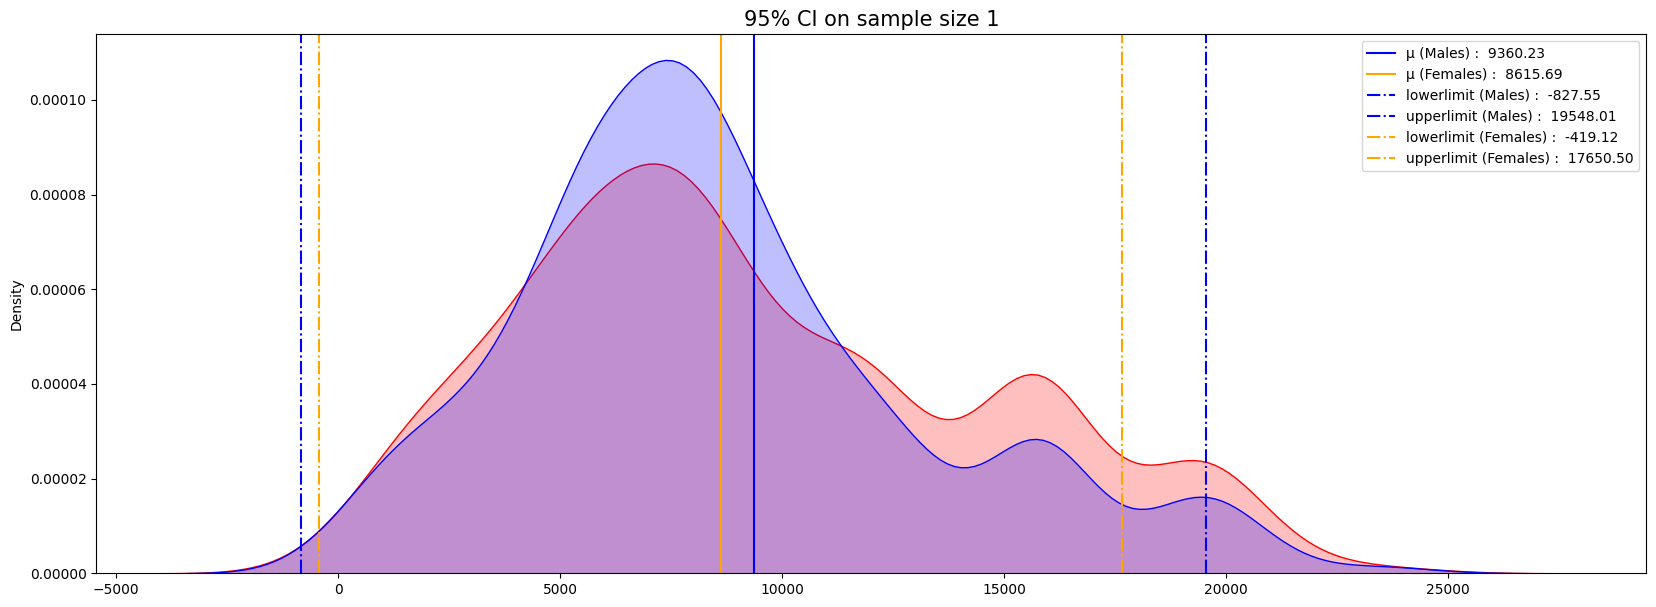

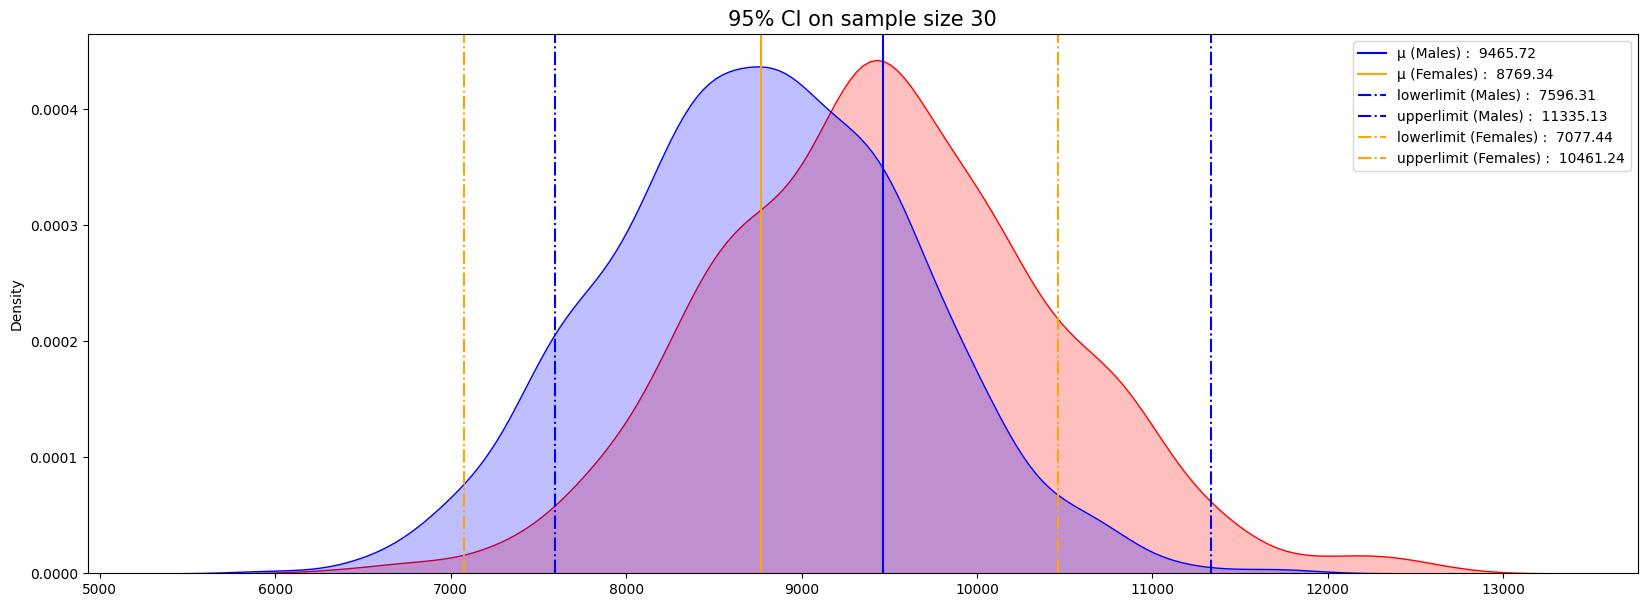

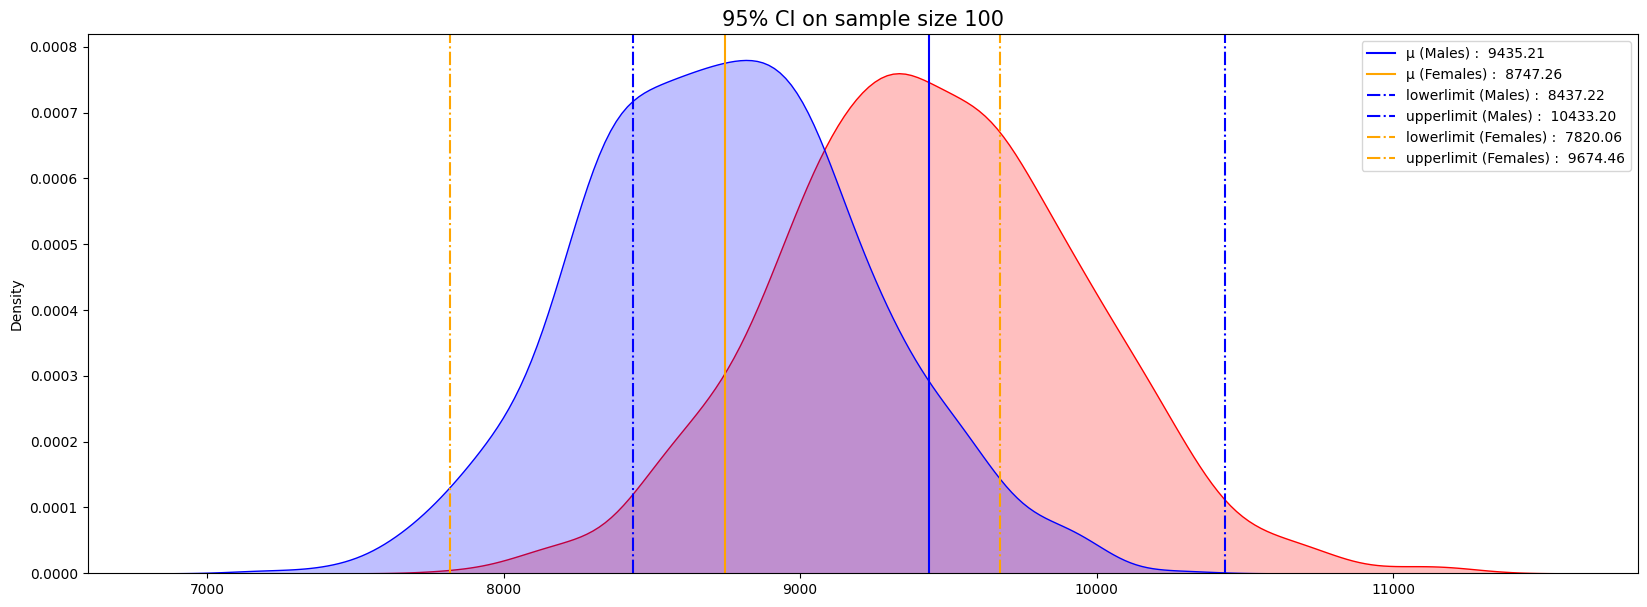

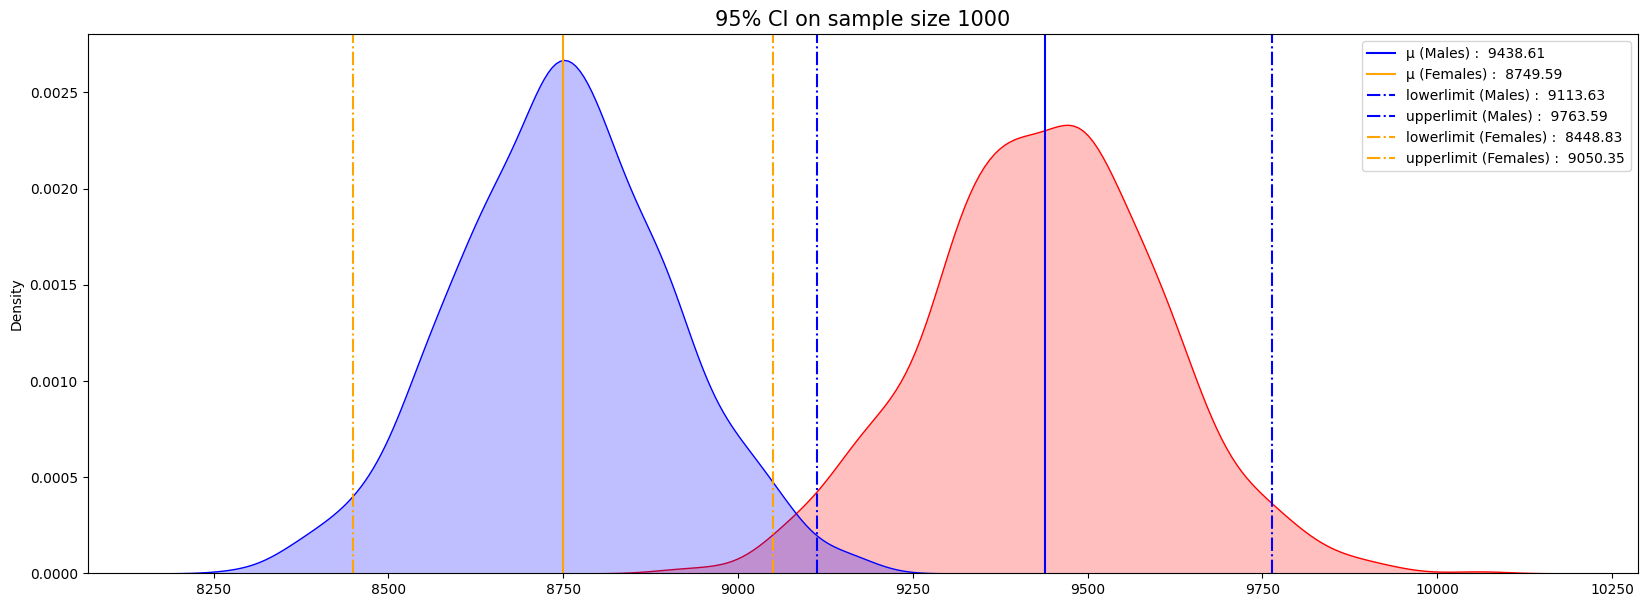

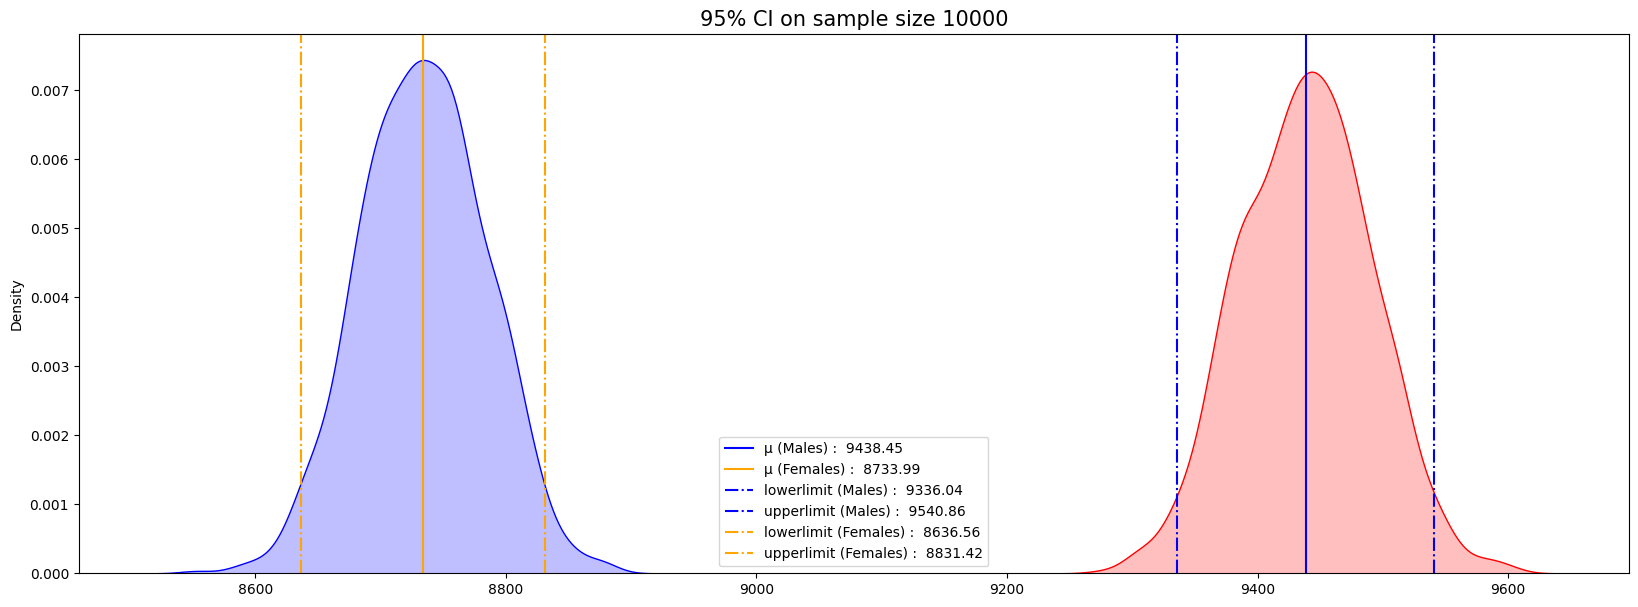

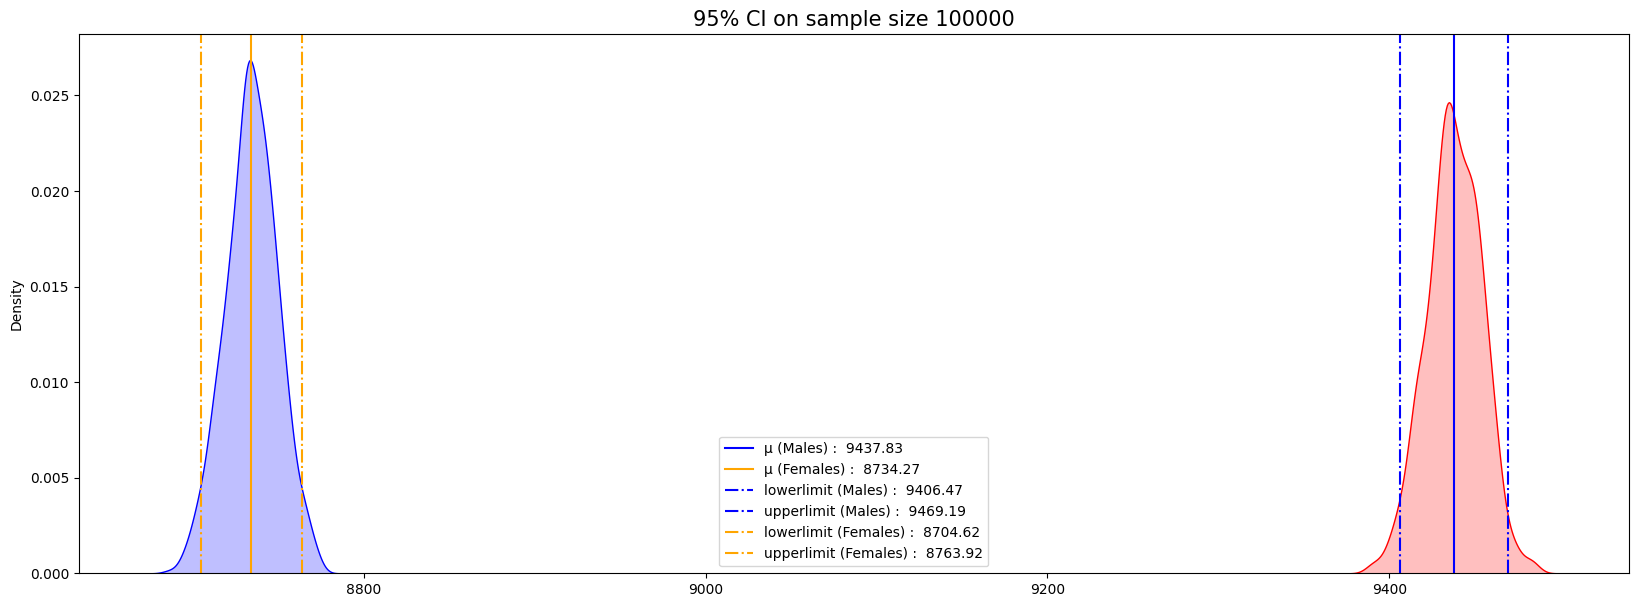

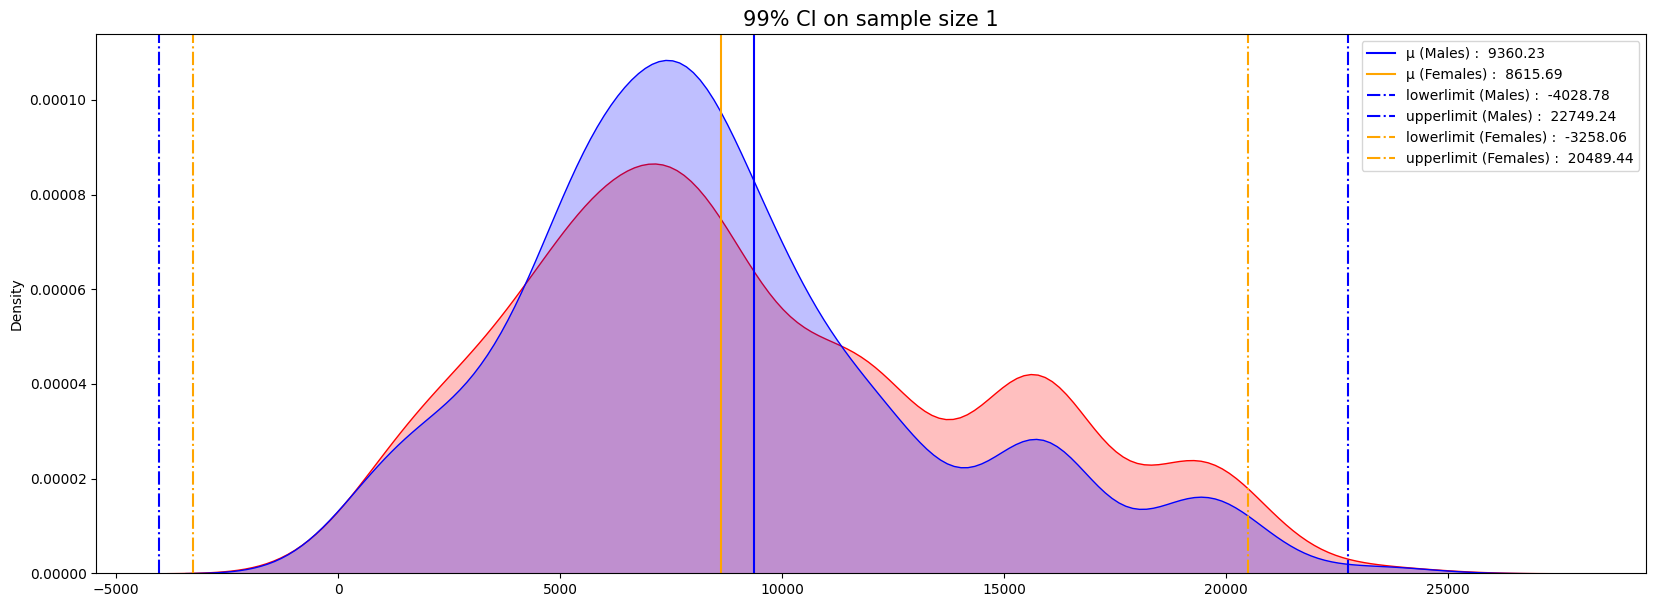

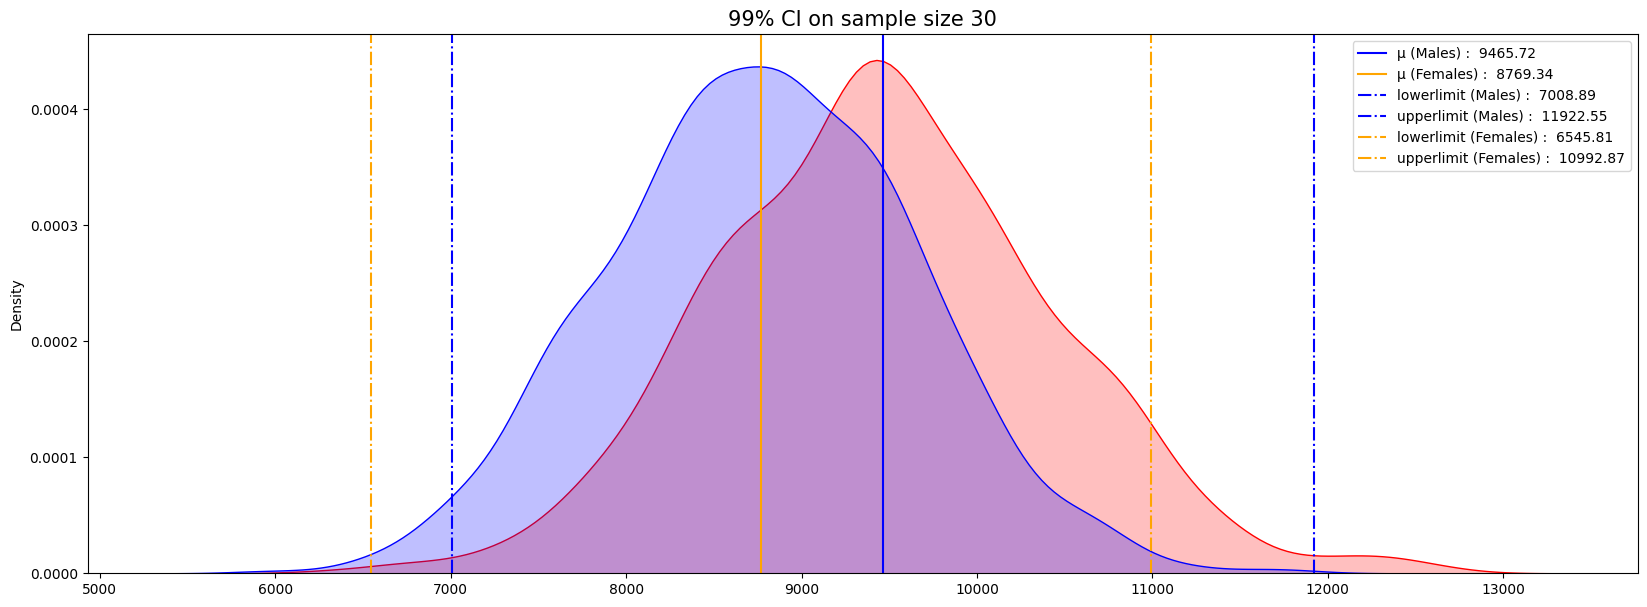

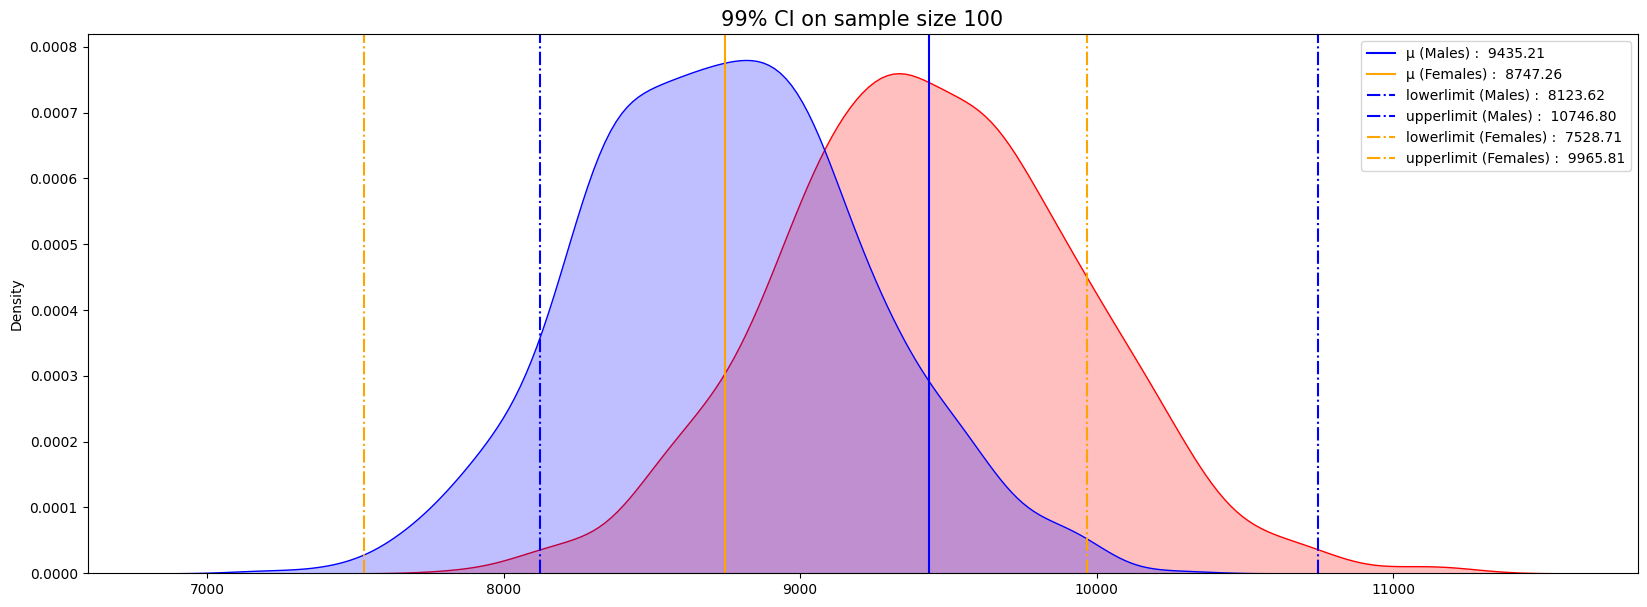

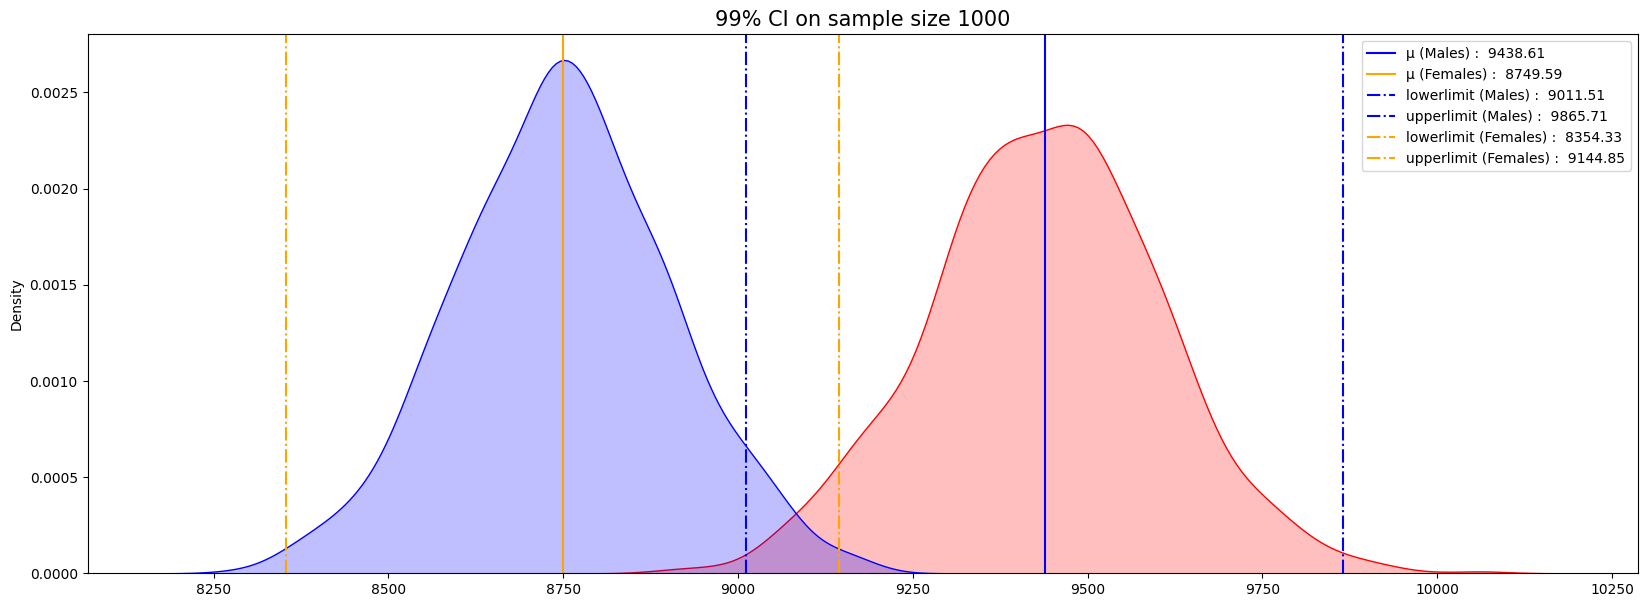

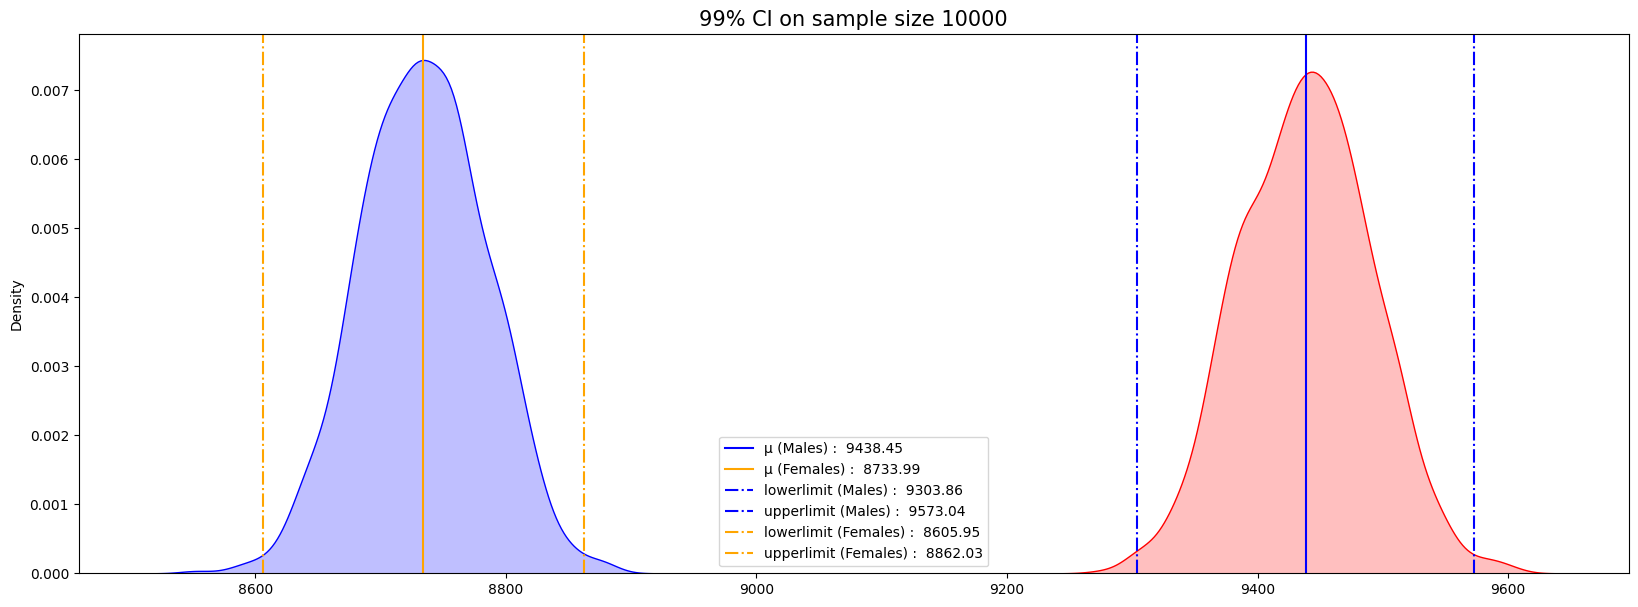

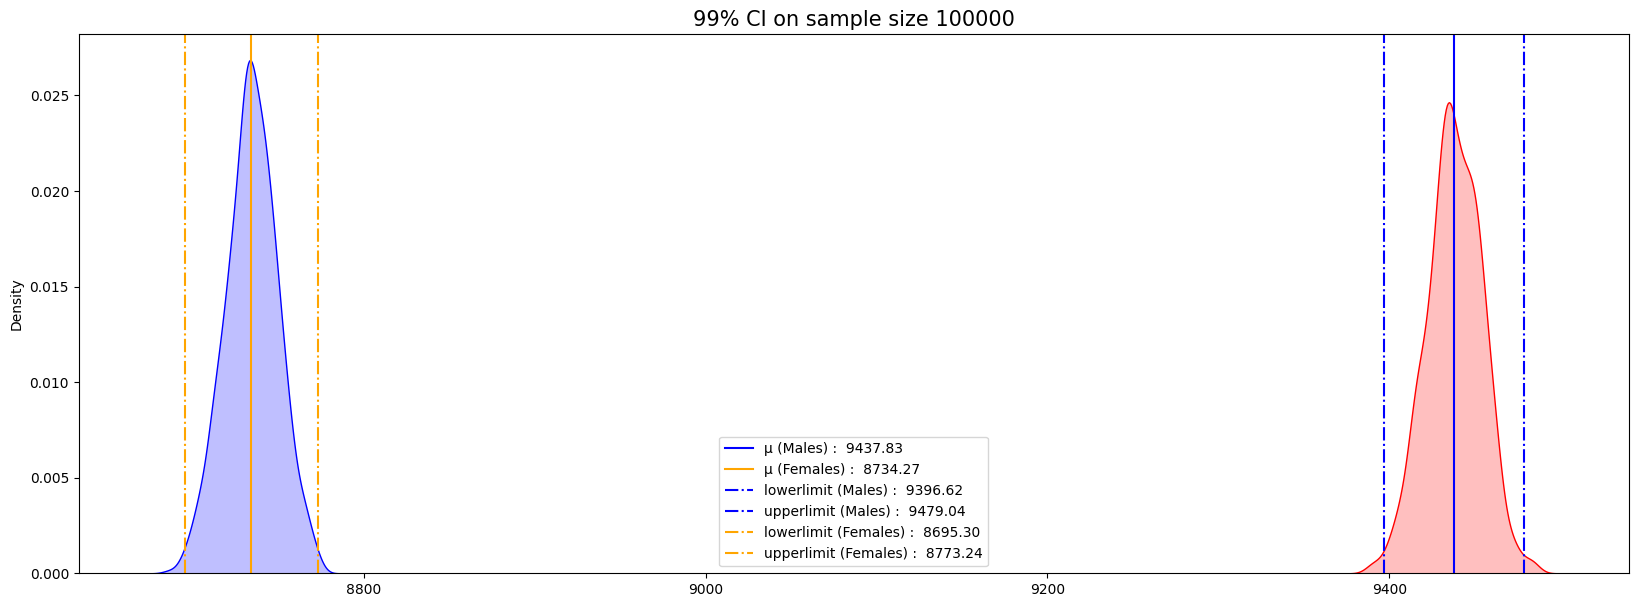

In [ ]:
#daframe storing all CI's for male and female with 90,95 and 99 confidence levels for diff sample sizes
overlap = pd.DataFrame({}, columns = ['Gender','Lower_limit','Upper_limit','Sample_Size','Range','Confidence_pct'])

for c in conf_level:

    for size in sample_list:

        ll_m = ci_M['sample_M_%s'%size][c]['lower_limit']
        ul_m = ci_M['sample_M_%s'%size][c]['upper_limit']

        ll_f = ci_F['sample_F_%s'%size][c]['lower_limit']
        ul_f = ci_F['sample_F_%s'%size][c]['upper_limit']

        plt.figure(figsize=(20,7))

        sns.kdeplot(x= avg_samples_M['sample_M_%s'%size], fill= True, common_grid=False, color= 'red')
        sns.kdeplot(x= avg_samples_F['sample_F_%s'%size], fill= True, common_grid=False, color= 'blue')

        plt.axvline(x_bar_M['sample_M_%s'%size], color = 'blue',
                    label= "μ (Males) :  {:.2f}".format(x_bar_M['sample_M_%s'%size]))
        plt.axvline(x_bar_F['sample_F_%s'%size], color = 'orange',
                    label= "μ (Females) :  {:.2f}".format(x_bar_F['sample_F_%s'%size]))

        plt.axvline(ll_m, color = 'blue',linestyle='dashdot',
                    label= "lowerlimit (Males) :  {:.2f}".format(ll_m))
        plt.axvline(ul_m, color = 'blue',linestyle='dashdot',
                    label= "upperlimit (Males) :  {:.2f}".format(ul_m))

        plt.axvline(ll_f, color = 'orange',linestyle='dashdot',
                    label= "lowerlimit (Females) :  {:.2f}".format(ll_f))
        plt.axvline(ul_f, color = 'orange',linestyle='dashdot',
                    label= "upperlimit (Females) :  {:.2f}".format(ul_f))

        plt.legend()
        plt.title(f'{c}% CI on sample size {size}', fontsize = 15)

        dict_M = pd.DataFrame([{'Gender': 'M','Lower_limit': ll_m,'Upper_limit': ul_m,
                               'Sample_Size': size,'Range': (ul_m-ll_m),'Confidence_pct': c}])
        dict_F = pd.DataFrame([{'Gender': 'F','Lower_limit': ll_f,'Upper_limit': ul_f,
                               'Sample_Size': size,'Range': (ul_f-ll_f),'Confidence_pct': c}]) # 'CI': [ll_m,ul_m],
        dict3 = pd.concat([dict_M,dict_F])
        overlap = pd.concat([overlap, dict3])

## **Insights**

**Trends as Sample Size Increases:**

Spreading Out: As the number of customers in each group (sample size) increases, the distribution of purchase amounts for both men and women spreads out further.

Less Overlap: With larger samples (10,000 and 100,000 customers), the curves representing the purchase distributions for men and women tend to separate more, showing less overlap in spending amounts.

**Sample Data Analysis:**

We looked at average purchase amounts (means), standard deviations (spread of data), and confidence intervals for various sample sizes (1, 30, 100, 1,000, 10,000, and 100,000) for both male and female customers.

Men Spend More on Average: The average purchase amount (mean) for men is consistently higher than for women across all sample sizes. This reinforces the finding that men tend to spend more overall.

As the sample size increases, the average spending amounts for both men and women become more stable. This is reflected by the decreasing standard deviations.

Females:
- 90% confidence: [8710.65, 8759.33] and diff in CI : 48.68
- 95% confidence: [8705.98, 8764.00] and diff in CI : 58.02
- 99% confidence: [8696.87, 8773.11] and diff in CI : 76.24

Males:
- 90% confidence: [9410.70, 9463.08] and diff in CI : 52.38
- 95% confidence: [9405.69, 9468.09] and diff in CI : 62.40
- 99% confidence: [9395.88, 9477.90] and diff in CI : 82.02


# **Analysing Purchase w.r.t Marital Status with 90,95 and 99% confidence**

In [ ]:
#Married and Unmarried customer Purchases
walmart_Mr_purchase = walmart_data[walmart_data.Marital_Status == 'Married']['Purchase']
walmart_UnMr_purchase = walmart_data[walmart_data.Marital_Status == 'Unmarried']['Purchase']

In [ ]:
mu_Mr = np.round(walmart_Mr_purchase.mean(),2) #population mean Married purchases
sigma_Mr = np.round(walmart_Mr_purchase.std(),2) #population standard deviation Married purchases

mu_UnMr = np.round(walmart_UnMr_purchase.mean(),2) #population mean Unmarried purchases
sigma_UnMr = np.round(walmart_UnMr_purchase.std(),2) #population standard deviation Unmarried purchases

print('Population Mean for married and unmarried customer Purchases:\n')
print(f'mu_Mr: {mu_Mr}, sigma_Mr: {sigma_Mr}')
print()
print(f'mu_UnMr: {mu_UnMr}, sigma_UnMr: {sigma_UnMr}')

Population Mean for married and unmarried customer Purchases:

mu_Mr: 9261.17, sigma_Mr: 5016.9

mu_UnMr: 9265.91, sigma_UnMr: 5027.35


In [ ]:
avg_samples_Mr = {} # stores all the average values of married customer purchases for a particular sample_size as key value pairs

# iterating on sample_list and appending each sample list with average of sample_list of purchases for married customers
for size in sample_list:
    avg_samples_Mr['sample_Mr_%s'%size] = []
    for i in range(itrn_size):
        avg_samples_Mr['sample_Mr_%s'%size].append(np.random.choice(walmart_Mr_purchase,size).mean().round(2))
print(avg_samples_Mr.keys())

avg_samples_UnMr = {} # stores all the average values of unmarried purchases for a particular sample_size as key value pairs

# iterating on sample_list and appending each sample list with average of sample_list of purchases for unmarried customers
for size in sample_list:
    avg_samples_UnMr['sample_UnMr_%s'%size] = []
    for i in range(itrn_size):
        avg_samples_UnMr['sample_UnMr_%s'%size].append(np.random.choice(walmart_UnMr_purchase,size).mean().round(2))
print(avg_samples_UnMr.keys())

dict_keys(['sample_Mr_1', 'sample_Mr_30', 'sample_Mr_100', 'sample_Mr_1000', 'sample_Mr_10000', 'sample_Mr_100000'])
dict_keys(['sample_UnMr_1', 'sample_UnMr_30', 'sample_UnMr_100', 'sample_UnMr_1000', 'sample_UnMr_10000', 'sample_UnMr_100000'])


In [ ]:
#storing sample mean, std and ci of married customers
x_bar_Mr = {}
std_Mr = {}
ci_Mr = {} # for storing CI for diff samples

for keys,values in avg_samples_Mr.items():
    x_bar_Mr[keys]={}
    std_Mr[keys]= {}
    ci_Mr[keys]={}

    x_bar = np.mean(values).round(2)
    std = np.std(values).round(2)

    x_bar_Mr[keys] = x_bar
    std_Mr[keys] = std

    ci={} # dict for storing CI for diff confidence levels

    for c in conf_level:
        ci[c]={}
        alpha = (1-(c/100))/2
        p_value = 1-alpha
        z_score = norm.ppf(p_value)

        lower_limit = np.round(x_bar - z_score *(std),2)
        upper_limit = np.round(x_bar + z_score *(std),2)

        ci[c].update({'lower_limit': lower_limit,
                      'upper_limit': upper_limit })

    ci_Mr[keys].update(ci)

print("x_bar_Mr: ", x_bar_Mr,'\n')
print("std_Mr: ", std_Mr,'\n')
print("ci_Mr: ", ci_Mr,'\n')

x_bar_Mr:  {'sample_Mr_1': 9290.63, 'sample_Mr_30': 9288.28, 'sample_Mr_100': 9270.34, 'sample_Mr_1000': 9253.13, 'sample_Mr_10000': 9260.21, 'sample_Mr_100000': 9260.53} 

std_Mr:  {'sample_Mr_1': 5021.15, 'sample_Mr_30': 910.1, 'sample_Mr_100': 519.02, 'sample_Mr_1000': 157.06, 'sample_Mr_10000': 51.24, 'sample_Mr_100000': 15.75} 

ci_Mr:  {'sample_Mr_1': {90: {'lower_limit': 1031.57, 'upper_limit': 17549.69}, 95: {'lower_limit': -550.64, 'upper_limit': 19131.9}, 99: {'lower_limit': -3643.0, 'upper_limit': 22224.26}}, 'sample_Mr_30': {90: {'lower_limit': 7791.3, 'upper_limit': 10785.26}, 95: {'lower_limit': 7504.52, 'upper_limit': 11072.04}, 99: {'lower_limit': 6944.02, 'upper_limit': 11632.54}}, 'sample_Mr_100': {90: {'lower_limit': 8416.63, 'upper_limit': 10124.05}, 95: {'lower_limit': 8253.08, 'upper_limit': 10287.6}, 99: {'lower_limit': 7933.43, 'upper_limit': 10607.25}}, 'sample_Mr_1000': {90: {'lower_limit': 8994.79, 'upper_limit': 9511.47}, 95: {'lower_limit': 8945.3, 'upper_l

In [ ]:
#storing sample mean, std and ci of unmarried customers
x_bar_UnMr = {}
std_UnMr = {}
ci_UnMr ={}

for keys,values in avg_samples_UnMr.items():
    x_bar_UnMr[keys]= {}
    std_UnMr[keys]= {}
    ci_UnMr[keys]={}

    x_bar = np.mean(values).round(2)
    std = np.std(values).round(2)

    x_bar_UnMr[keys] = x_bar
    std_UnMr[keys] = std

    ci={} # dict for storing CI for diff confidence levels

    for c in conf_level:
        ci[c]={}
        alpha = (1-(c/100))/2
        p_value = 1-alpha
        z_score = norm.ppf(p_value)

        lower_limit = np.round(x_bar - z_score * std ,2)
        upper_limit = np.round(x_bar + z_score * std ,2)
        #print(lower_limit,upper_limit)

        ci[c].update({'lower_limit': lower_limit,
                      'upper_limit': upper_limit })

    ci_UnMr[keys].update(ci)

print("x_bar_UnMr: ", x_bar_UnMr,'\n')
print("std_UnMr: ", std_UnMr,'\n')
print("ci_UnMr: ",  ci_UnMr,'\n')

x_bar_UnMr:  {'sample_UnMr_1': 9247.82, 'sample_UnMr_30': 9252.96, 'sample_UnMr_100': 9269.6, 'sample_UnMr_1000': 9270.66, 'sample_UnMr_10000': 9266.72, 'sample_UnMr_100000': 9265.94} 

std_UnMr:  {'sample_UnMr_1': 5087.13, 'sample_UnMr_30': 921.61, 'sample_UnMr_100': 520.28, 'sample_UnMr_1000': 161.09, 'sample_UnMr_10000': 49.0, 'sample_UnMr_100000': 15.58} 

ci_UnMr:  {'sample_UnMr_1': {90: {'lower_limit': 880.24, 'upper_limit': 17615.4}, 95: {'lower_limit': -722.77, 'upper_limit': 19218.41}, 99: {'lower_limit': -3855.76, 'upper_limit': 22351.4}}, 'sample_UnMr_30': {90: {'lower_limit': 7737.05, 'upper_limit': 10768.87}, 95: {'lower_limit': 7446.64, 'upper_limit': 11059.28}, 99: {'lower_limit': 6879.05, 'upper_limit': 11626.87}}, 'sample_UnMr_100': {90: {'lower_limit': 8413.82, 'upper_limit': 10125.38}, 95: {'lower_limit': 8249.87, 'upper_limit': 10289.33}, 99: {'lower_limit': 7929.45, 'upper_limit': 10609.75}}, 'sample_UnMr_1000': {90: {'lower_limit': 9005.69, 'upper_limit': 9535.63}

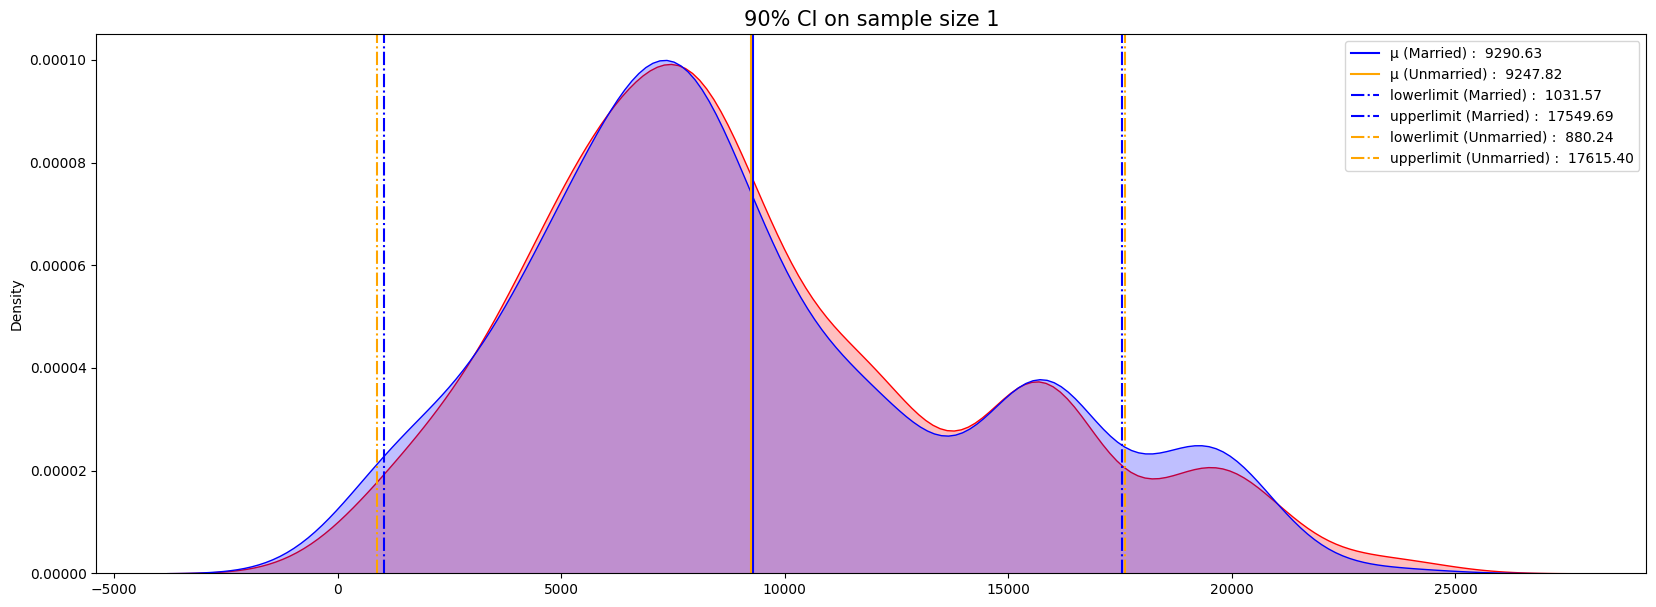

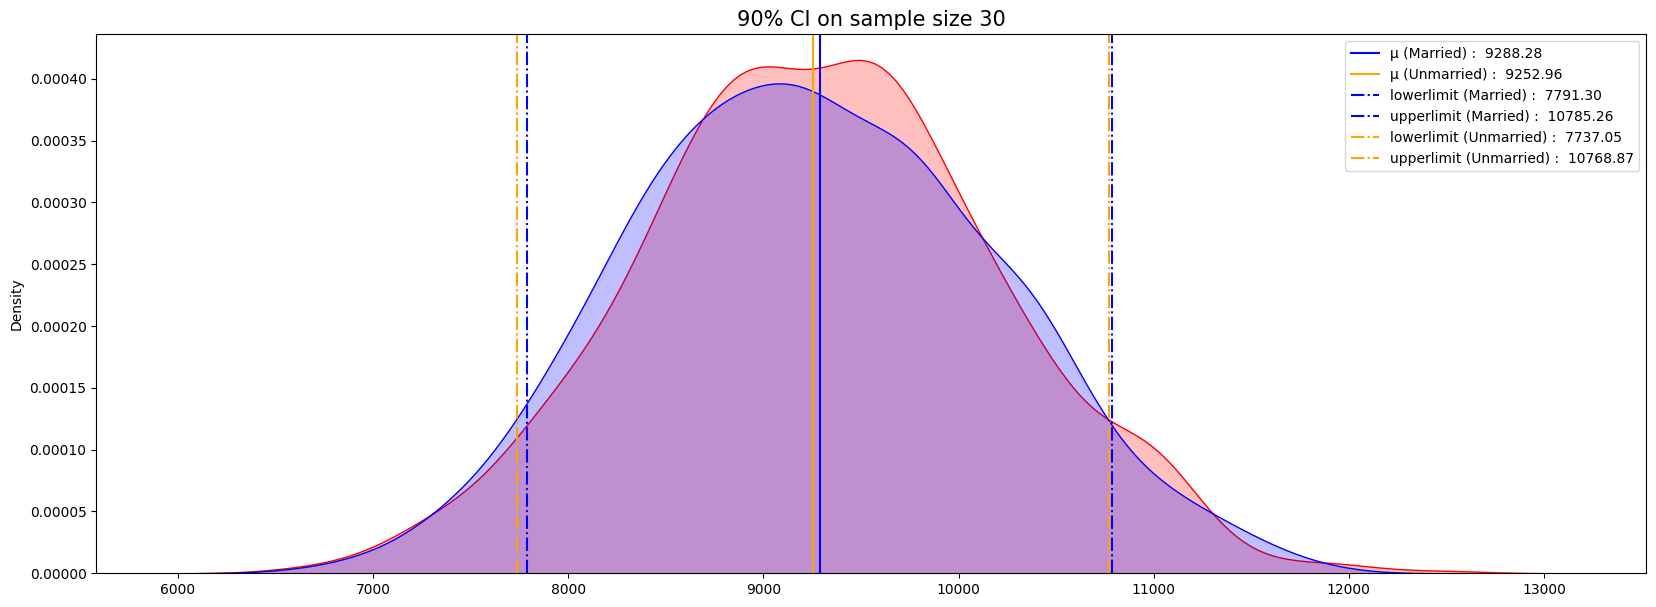

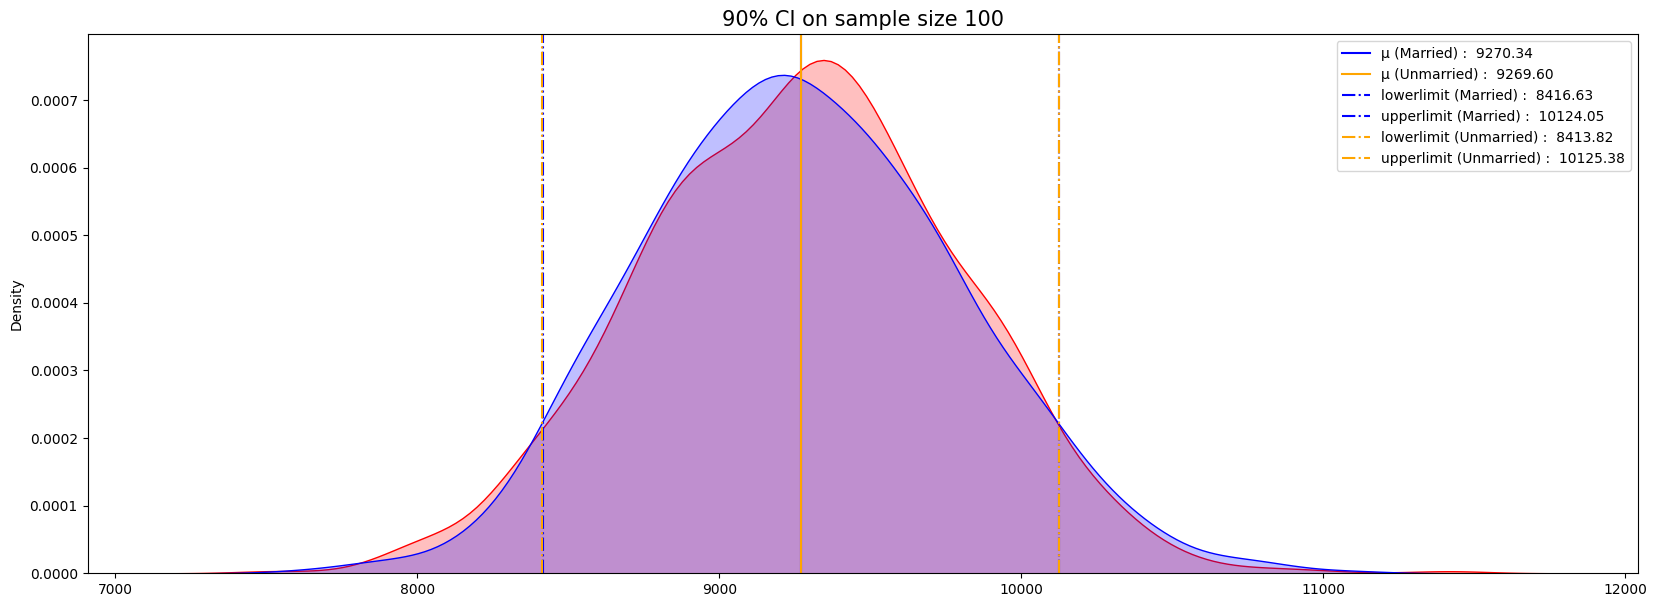

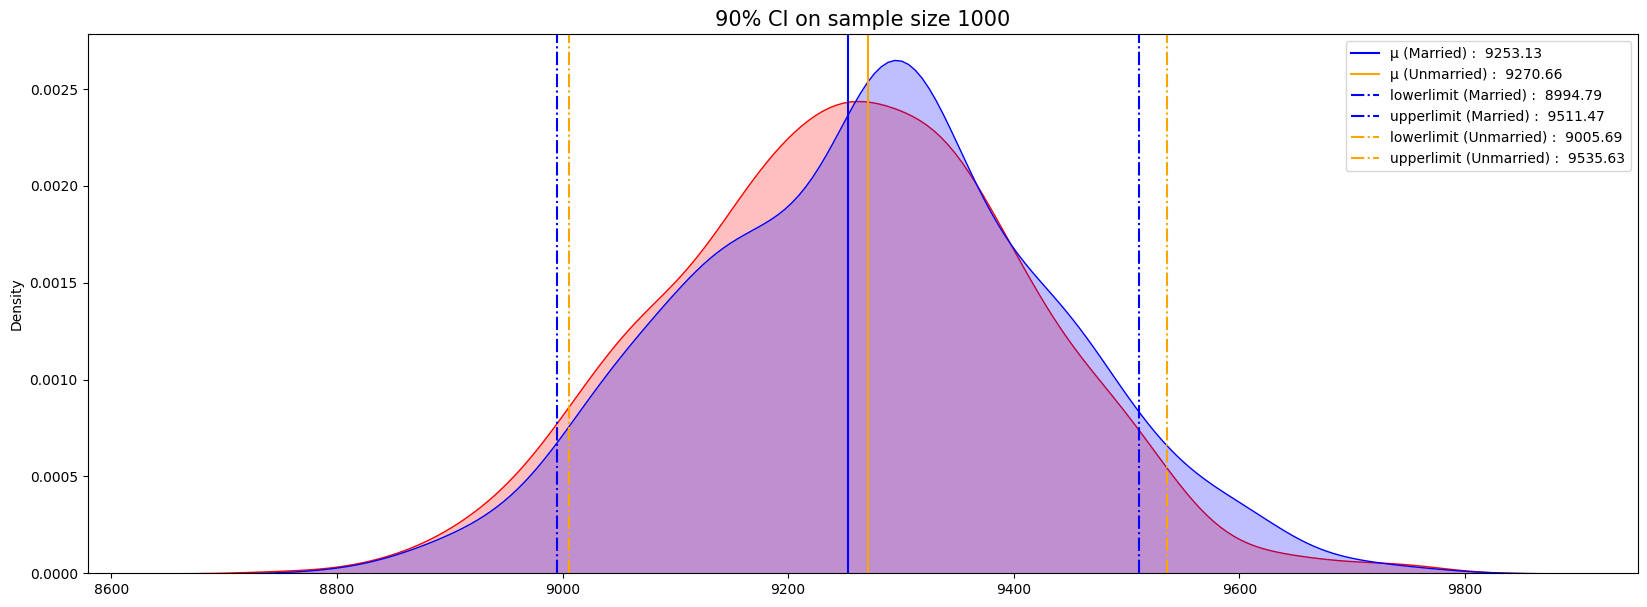

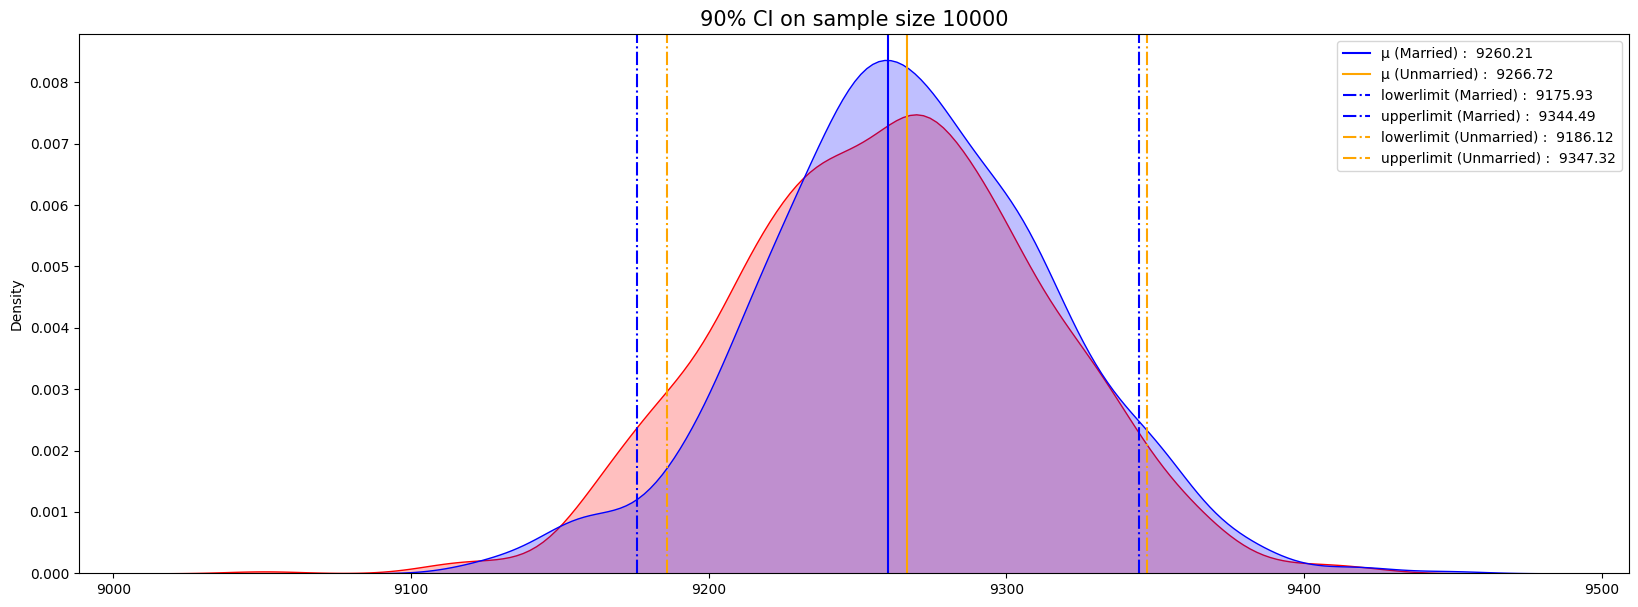

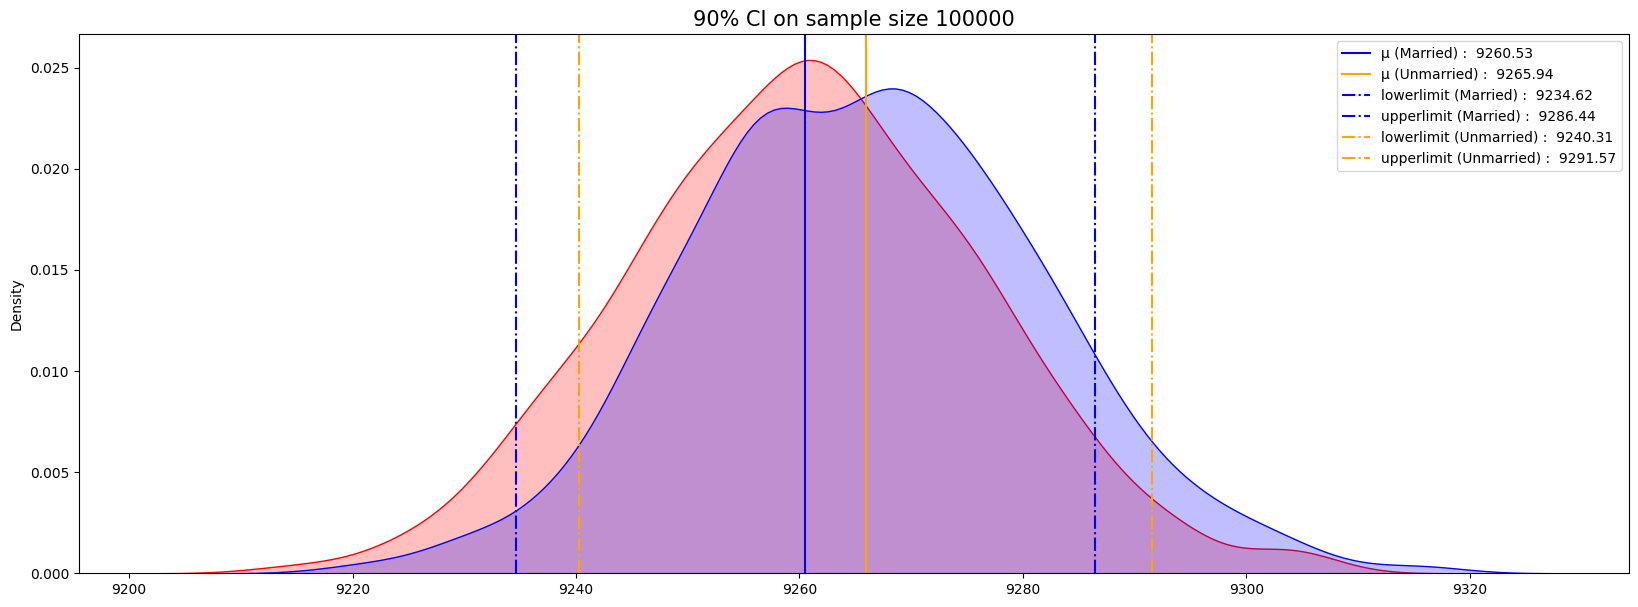

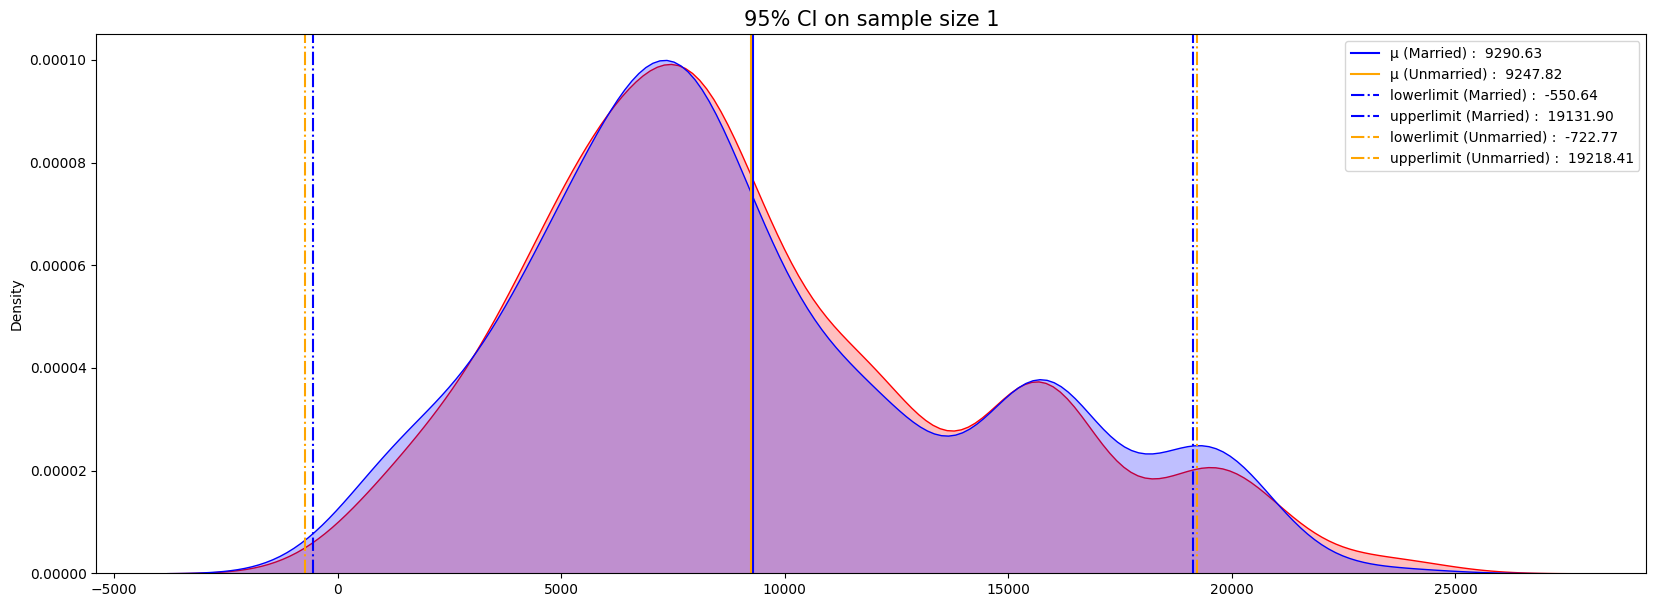

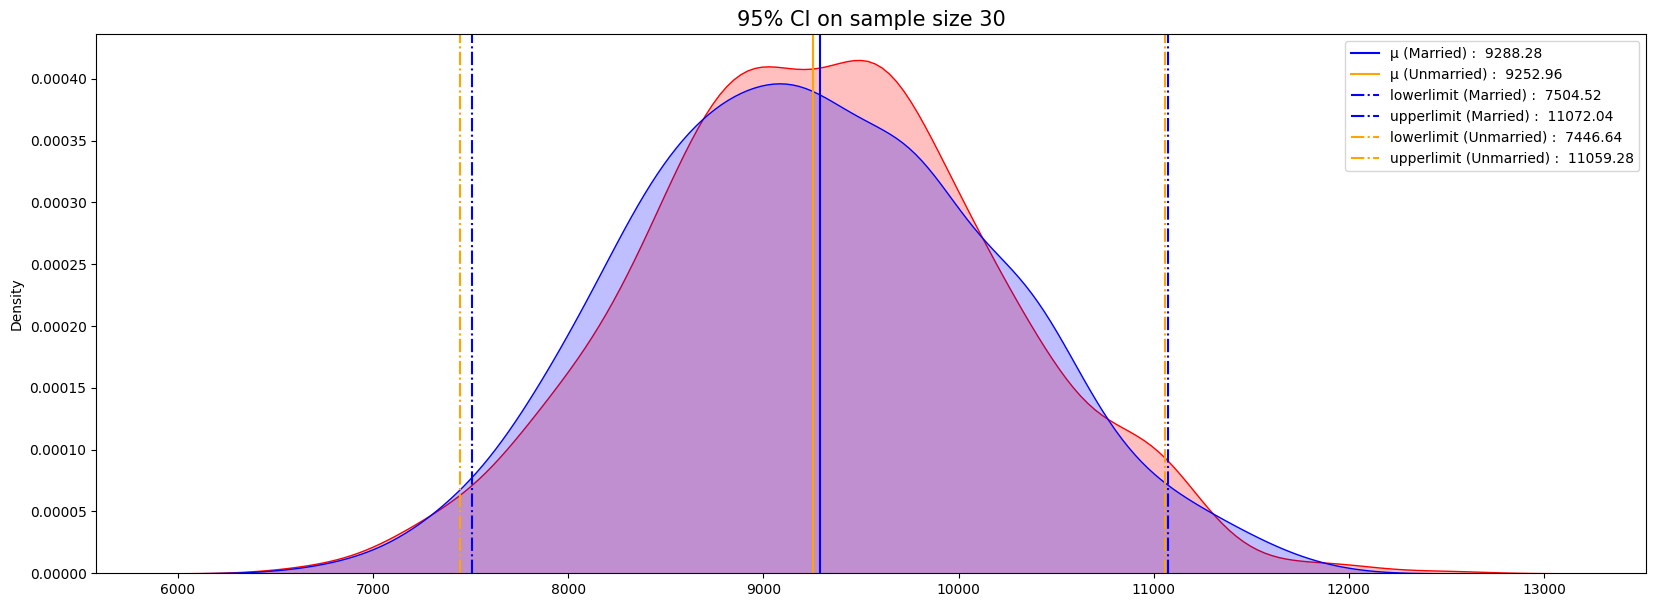

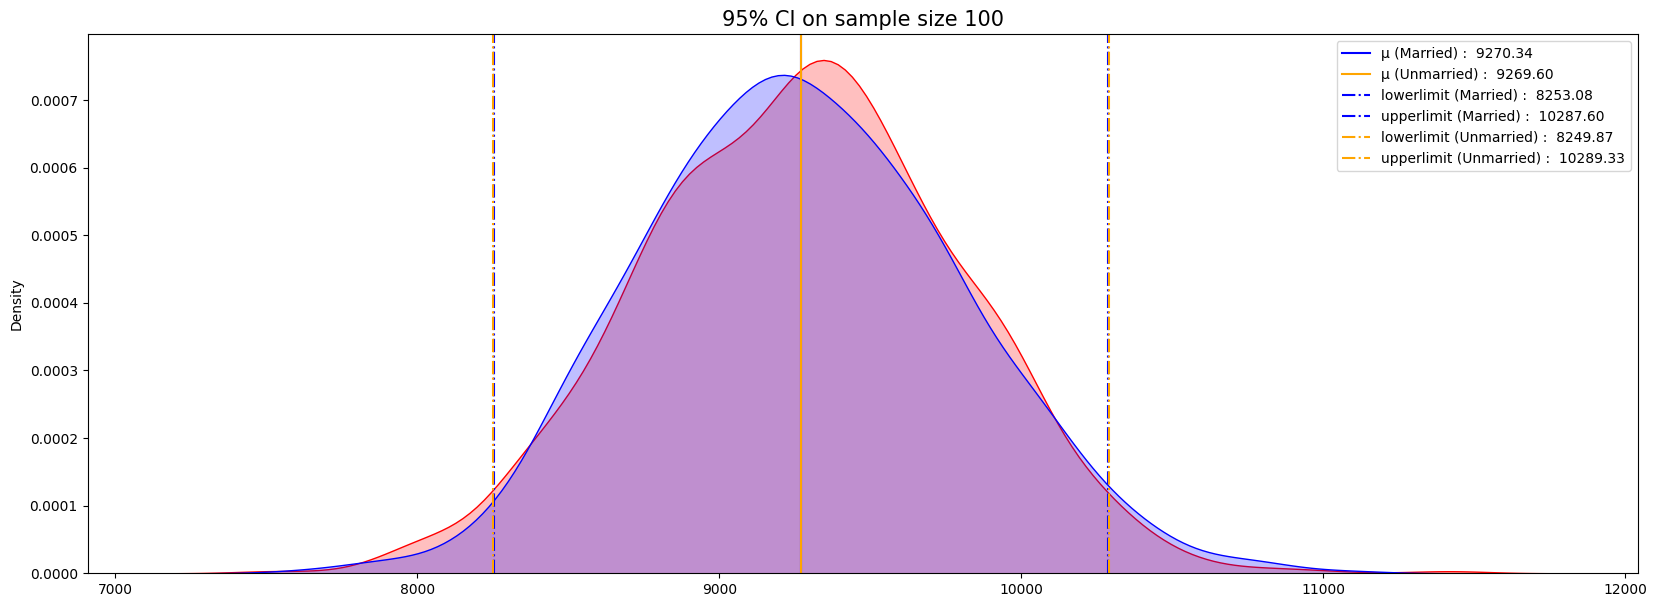

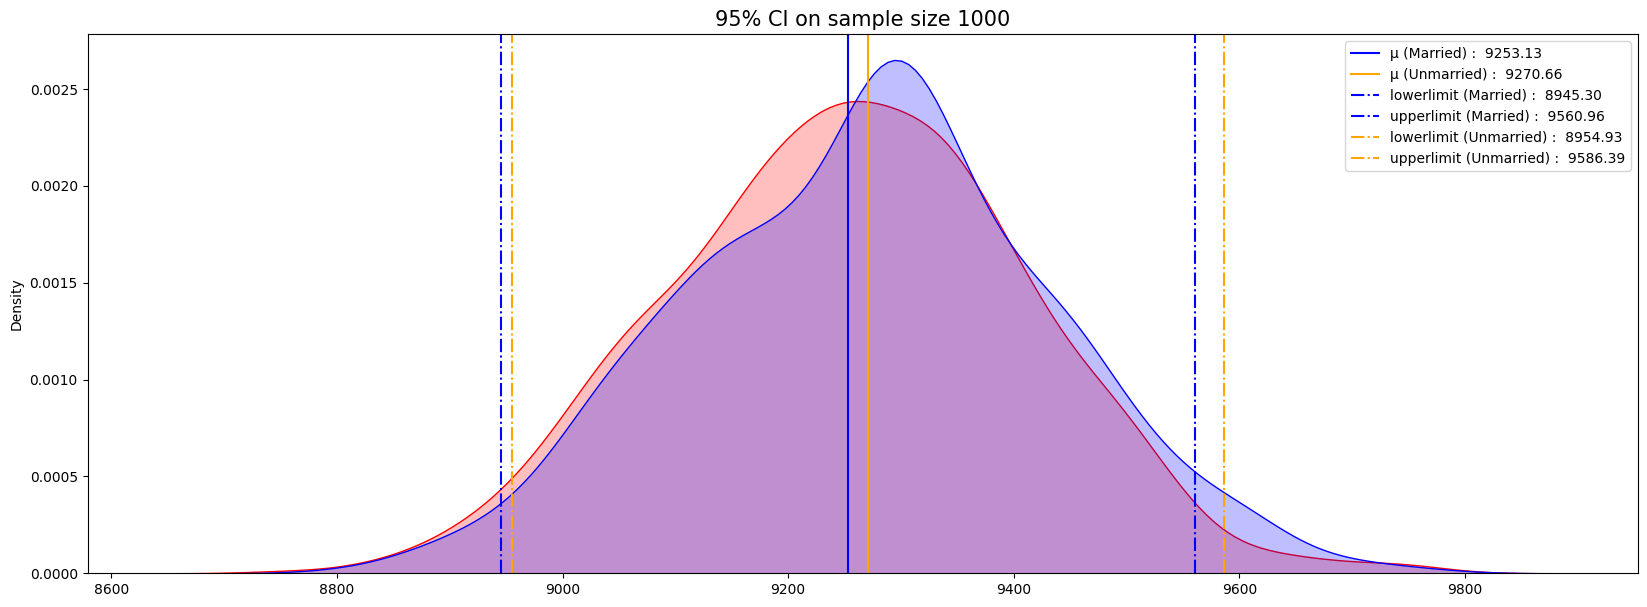

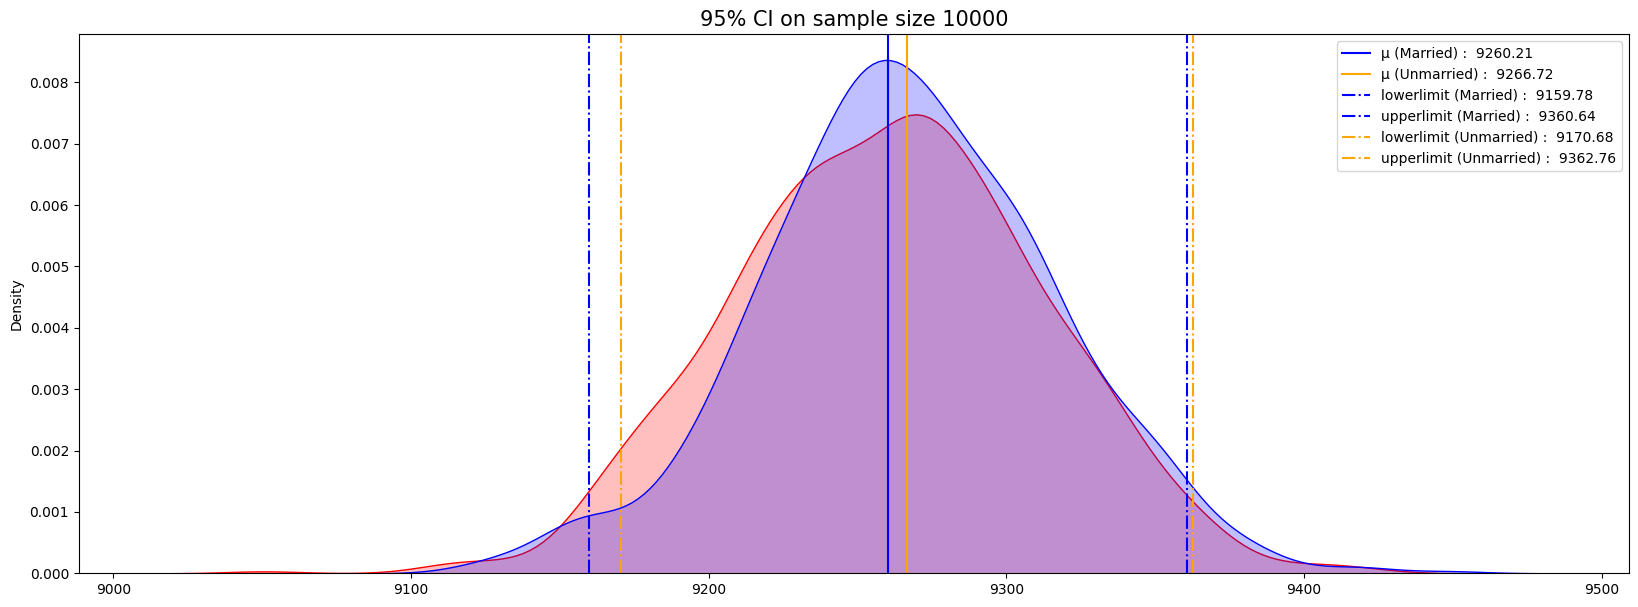

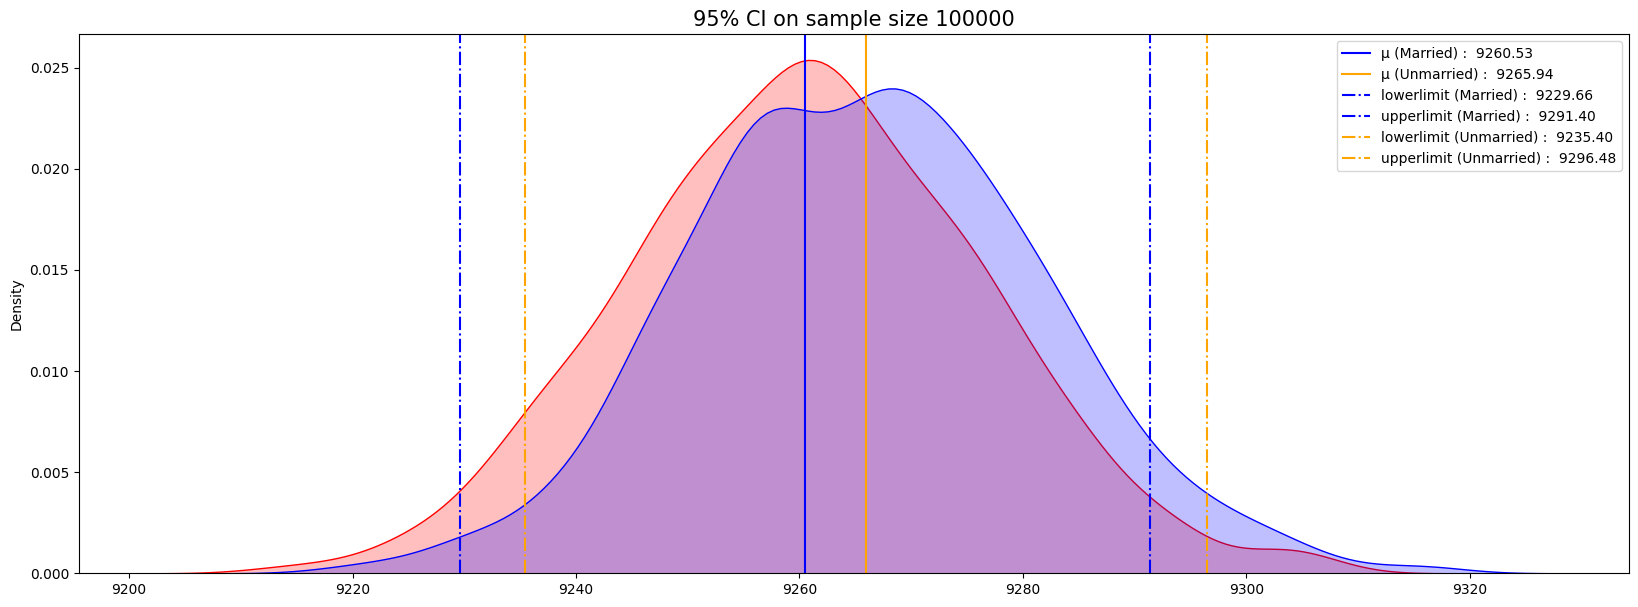

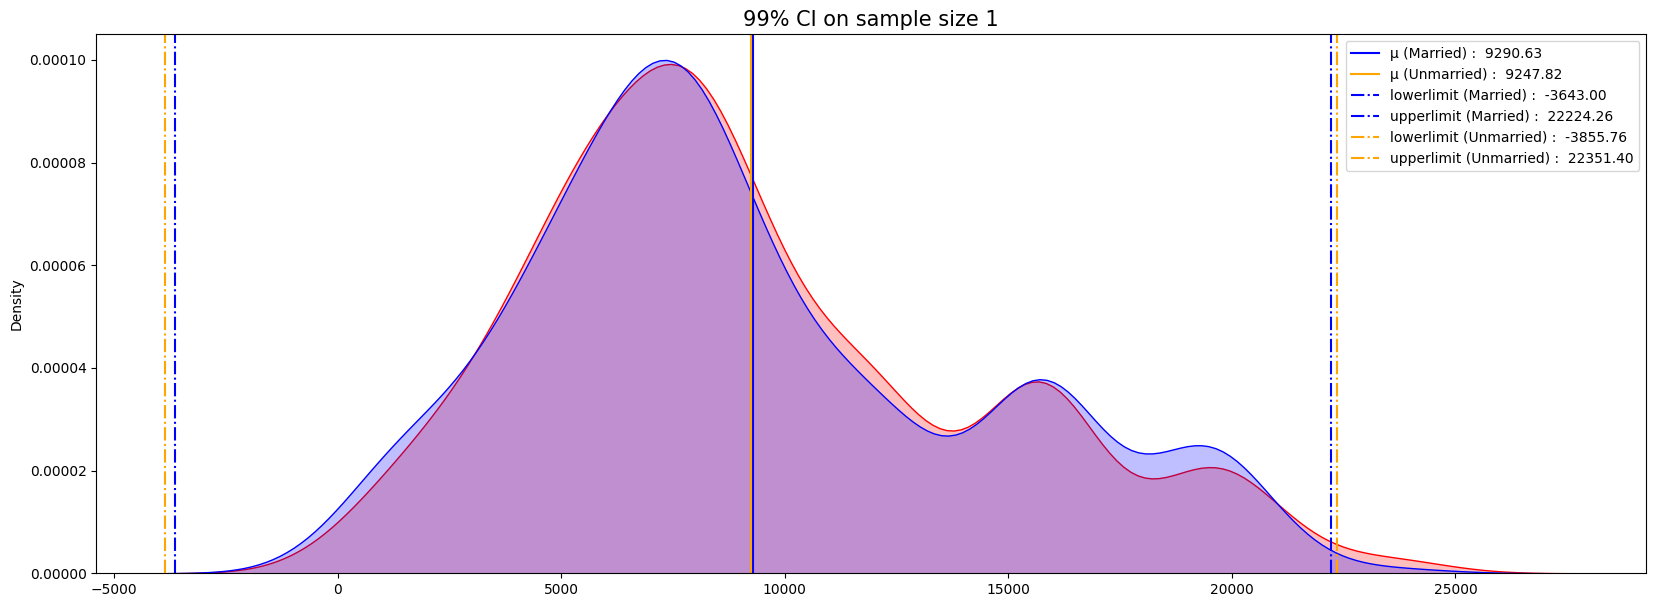

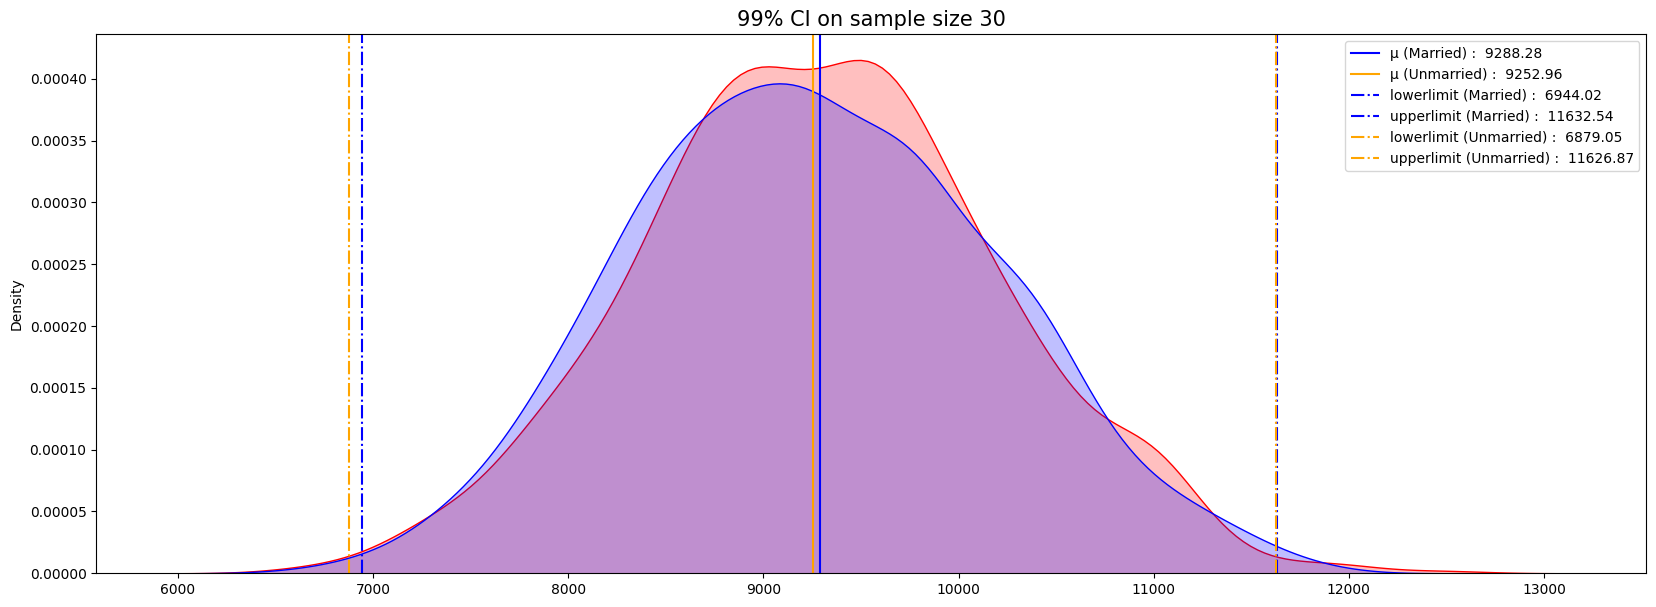

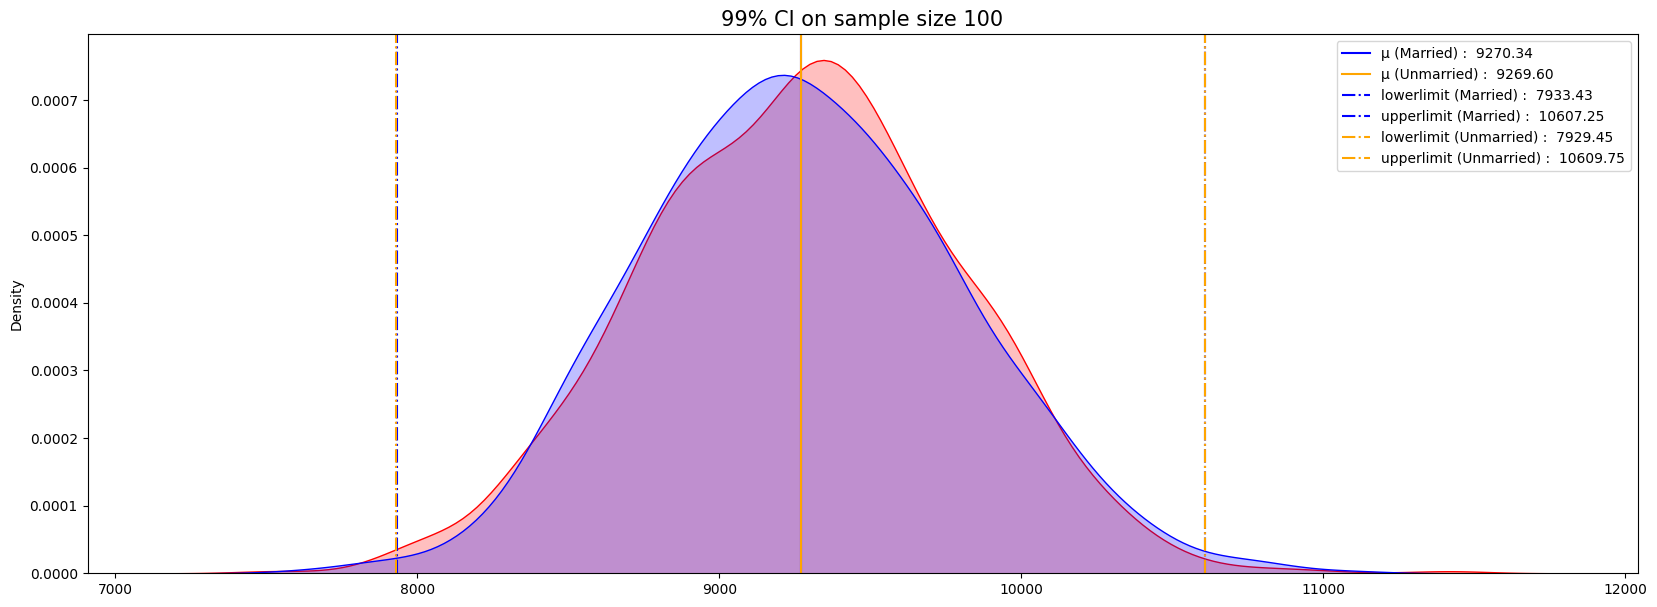

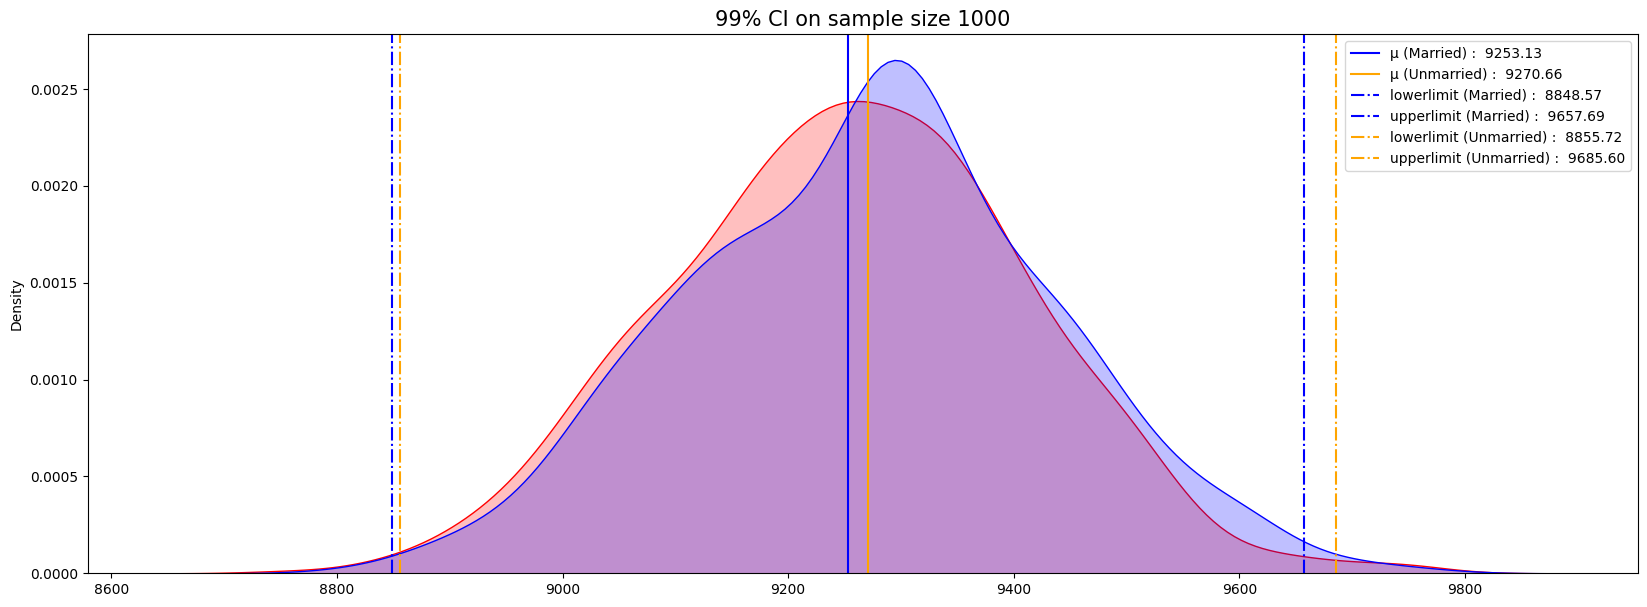

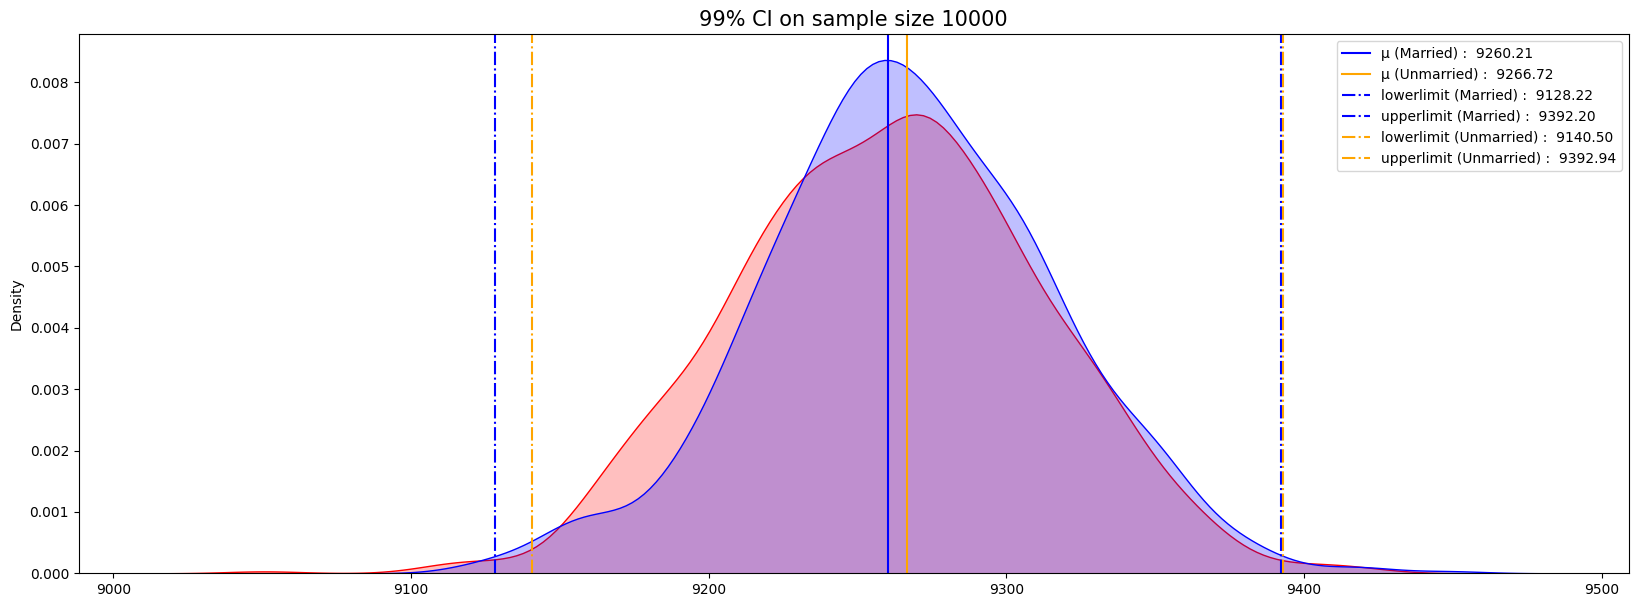

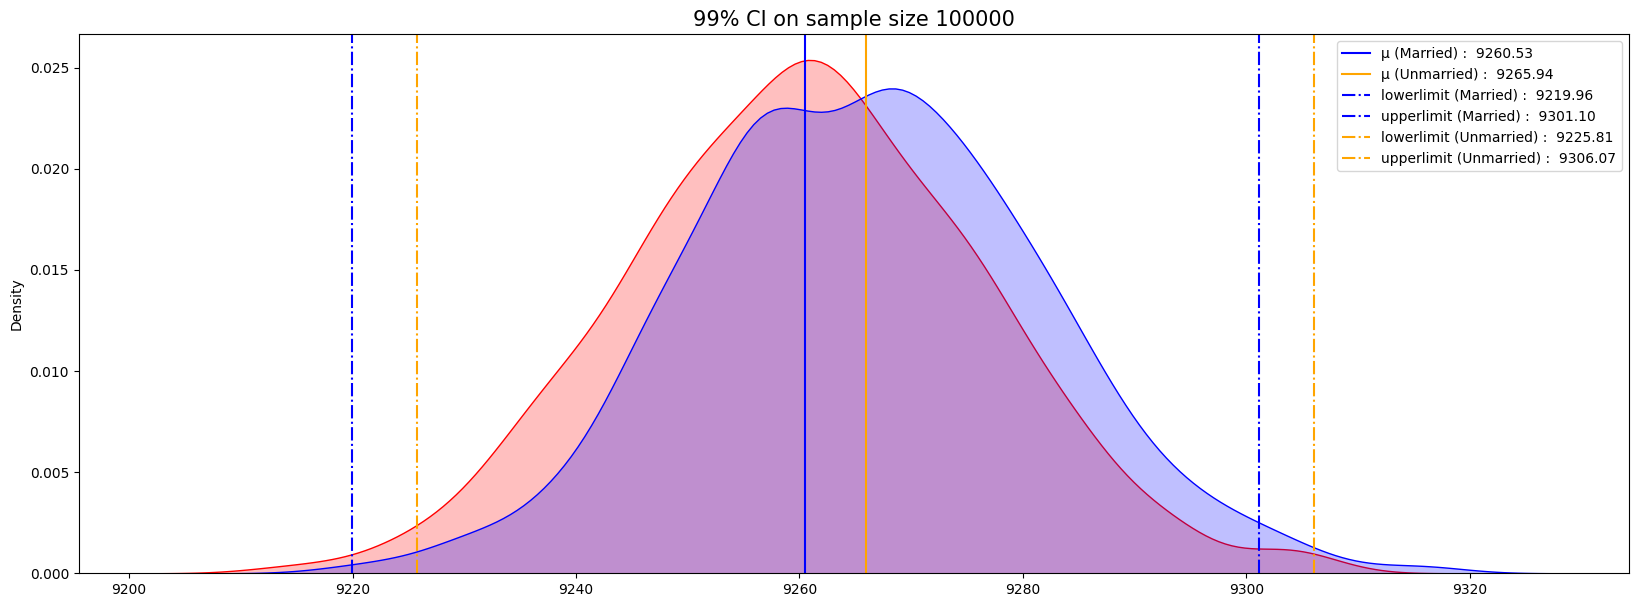

In [ ]:
overlap_MS = pd.DataFrame({}, columns = ['Marital_Status','Lower_limit','Upper_limit','Sample_Size','Range','Confidence_pct'])

#loop for kde for diff samples and confidence levels
for c in conf_level:

    for size in sample_list:

        ll_mr = ci_Mr['sample_Mr_%s'%size][c]['lower_limit']
        ul_mr = ci_Mr['sample_Mr_%s'%size][c]['upper_limit']

        ll_unmr = ci_UnMr['sample_UnMr_%s'%size][c]['lower_limit']
        ul_unmr = ci_UnMr['sample_UnMr_%s'%size][c]['upper_limit']

        plt.figure(figsize=(20,7))

        sns.kdeplot(x= avg_samples_Mr['sample_Mr_%s'%size], fill= True, common_grid=False, color= 'red')
        sns.kdeplot(x= avg_samples_UnMr['sample_UnMr_%s'%size], fill= True, common_grid=False, color= 'blue')

        plt.axvline(x_bar_Mr['sample_Mr_%s'%size], color = 'blue',
                    label= "μ (Married) :  {:.2f}".format(x_bar_Mr['sample_Mr_%s'%size]))
        plt.axvline(x_bar_UnMr['sample_UnMr_%s'%size], color = 'orange',
                    label= "μ (Unmarried) :  {:.2f}".format(x_bar_UnMr['sample_UnMr_%s'%size]))

        plt.axvline(ll_mr, color = 'blue',linestyle='dashdot',
                    label= "lowerlimit (Married) :  {:.2f}".format(ll_mr))
        plt.axvline(ul_mr, color = 'blue',linestyle='dashdot',
                    label= "upperlimit (Married) :  {:.2f}".format(ul_mr))

        plt.axvline(ll_unmr, color = 'orange',linestyle='dashdot',
                    label= "lowerlimit (Unmarried) :  {:.2f}".format(ll_unmr))
        plt.axvline(ul_unmr, color = 'orange',linestyle='dashdot',
                    label= "upperlimit (Unmarried) :  {:.2f}".format(ul_unmr))

        plt.legend()
        plt.title(f'{c}% CI on sample size {size}', fontsize = 15)

        dict_Mr = pd.DataFrame([{'Marital_Status': 1 ,'Lower_limit': ll_mr,'Upper_limit': ul_mr,
                               'Sample_Size': size,'Range': (ul_mr-ll_mr),'Confidence_pct': c}])
        dict_UnMr = pd.DataFrame([{'Marital_Status': 0 ,'Lower_limit': ll_unmr,'Upper_limit': ul_unmr,
                               'Sample_Size': size,'Range': (ul_unmr-ll_unmr),'Confidence_pct': c}]) # 'CI': [ll_m,ul_m],
        dict3 = pd.concat([dict_Mr,dict_UnMr])
        overlap_MS = pd.concat([overlap_MS, dict3])

## **Insights**

We looked at average purchase amounts (means), standard deviations (spread of data), and confidence intervals for various sample sizes (1, 30, 100, 1,000, 10,000, and 100,000) for both married and unmarried customers.

Similar Average Spending: The average purchase amount (mean) for married and unmarried customers is very similar across all sample sizes. This reinforces the finding that marital status doesn't seem to have a big impact on how much is typically spent per transaction.

Slight Decrease in Spread: As the sample size increases, the standard deviations for both married and unmarried customers decrease slightly. This indicates a small decrease in the spread of purchase amounts within each group.

Married:
- 90% confidence: [9234.33, 9287.29] and diff in CI : 52.96
- 95% confidence: [9229.25, 9292.37	] and diff in CI : 63.12
- 99% confidence: [9219.34, 9302.28] and diff in CI : 82.94

Unmarried:
- 90% confidence: [9239.66, 9290.48] and diff in CI : 50.82
- 95% confidence: [9234.79, 9295.35] and diff in CI : 60.56
- 99% confidence: [9225.278, 9304.87] and diff in CI : 79.60

# **Analysing Purchase w.r.t Age with 90,95 and 99% confidence**

In [ ]:
# Calculating mean, std and CI for customers in diff agegroup
def bootstrapping_age(sample,smp_siz=500,itr_size=5000,confidence_level=0.95,age= "0-17", no_of_tails=2):

    smp_means_m = np.empty(itr_size)
    for i in range(itr_size):
        smp_n = np.empty(smp_siz)
        smp_n = np.random.choice(sample, size = smp_siz,replace=True)
        smp_means_m[i] = np.mean(smp_n)

    #Calcualte the Z-Critical value
    alpha = (1 - confidence_level)/no_of_tails
    z_critical = norm.ppf(1 - alpha)

    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean  = np.mean(smp_means_m)
    sigma = np.std(smp_means_m)

    lower_limit = mean - (z_critical * sigma)
    upper_limit = mean + (z_critical * sigma)

    fig, ax = plt.subplots(figsize=(14,6))
    #sns.set_style("darkgrid")

    sns.kdeplot(data=smp_means_m,color="#7A68A6",fill=True,linewidth=2)

    label_mean=("μ :  {:.2f}".format(mean))
    label_ult=("Lower Limit:  {:.2f}\nUpper Limit:   {:.2f}".format(lower_limit,upper_limit))

    plt.title(f"{confidence_level * 100} CI on sample size {smp_siz} on age bracket {age}")
    plt.xlabel('Purchase')
    plt.axvline(mean, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean)
    plt.axvline(upper_limit, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult)
    plt.axvline(lower_limit, color = 'r', linestyle = 'solid', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()

    return mean,np.round(lower_limit,2),np.round(upper_limit,2)

**Calculating 90% CI**

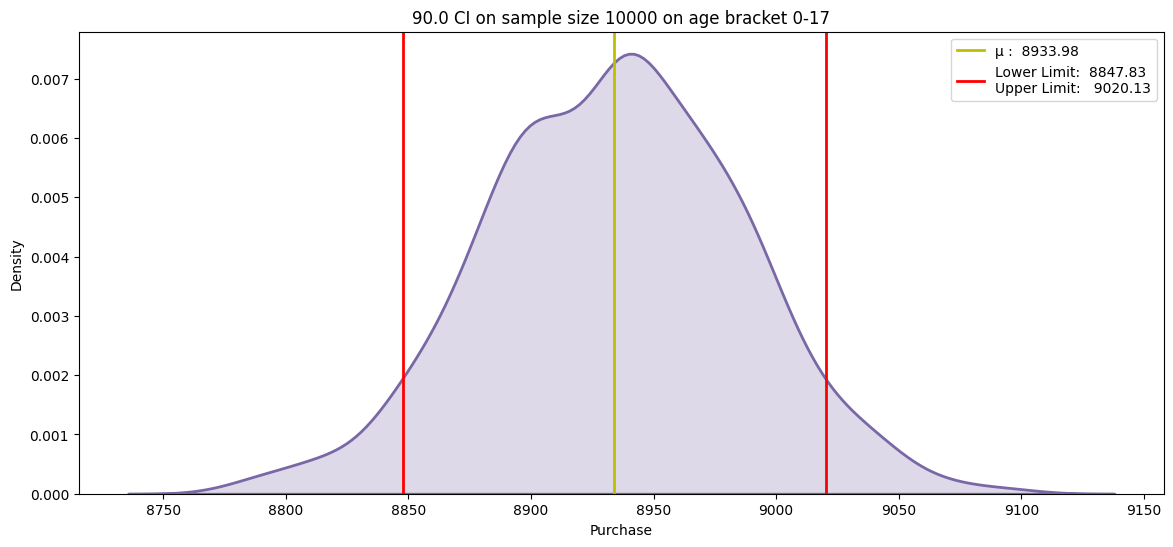

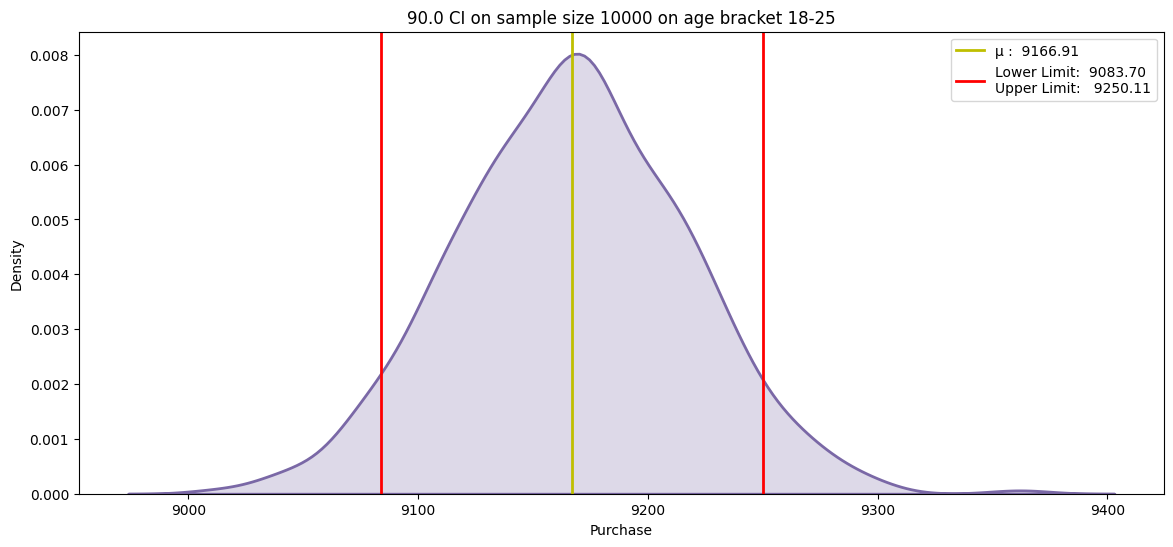

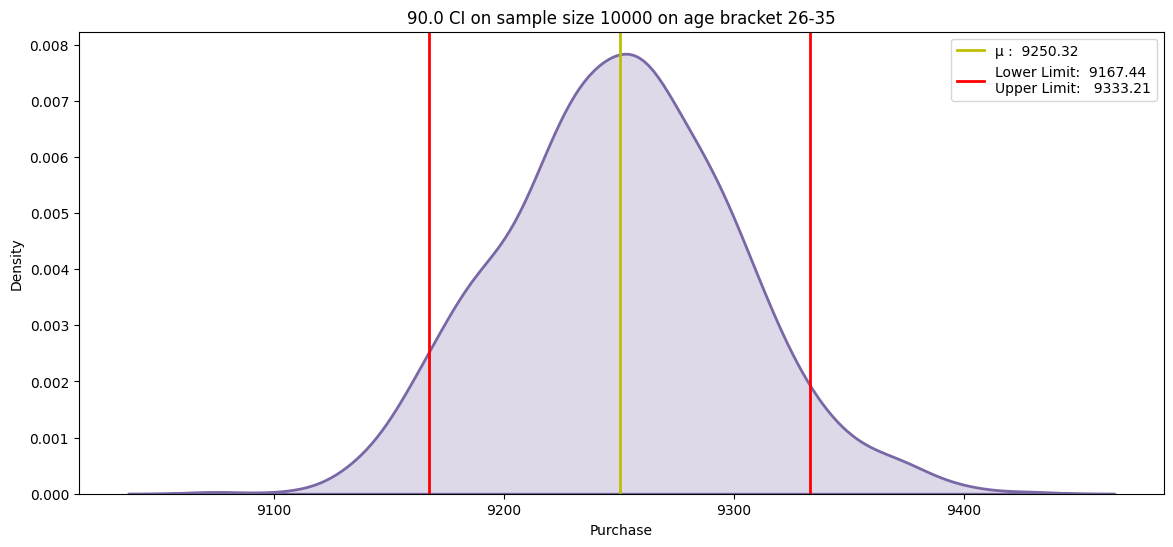

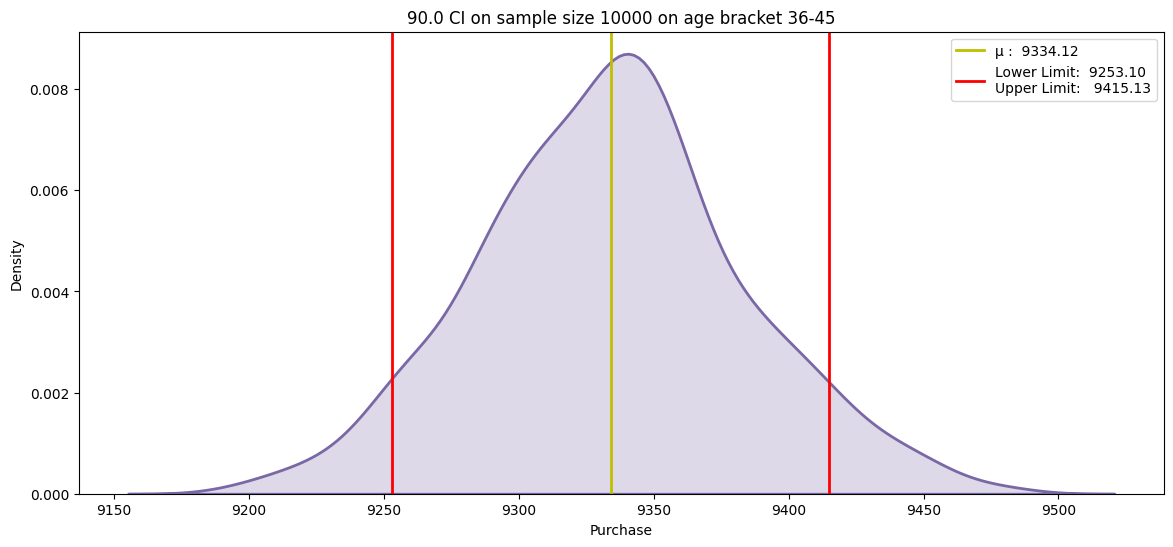

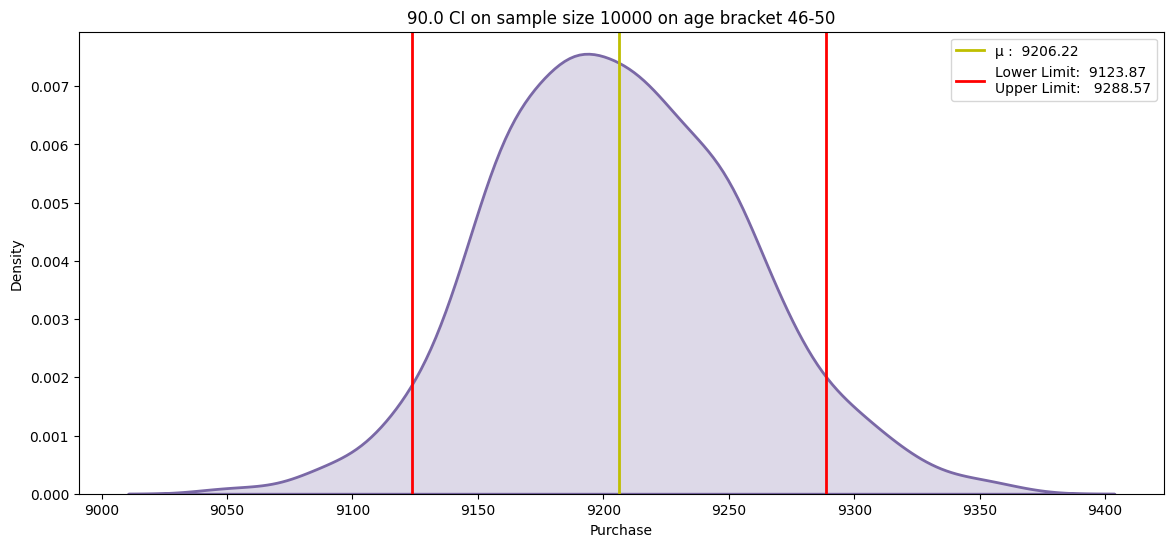

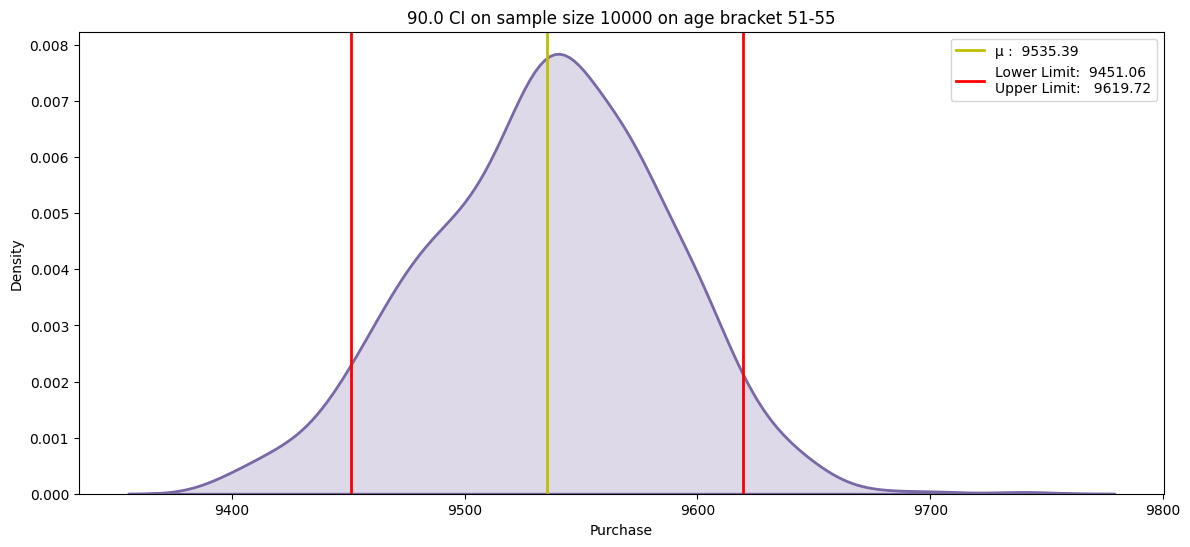

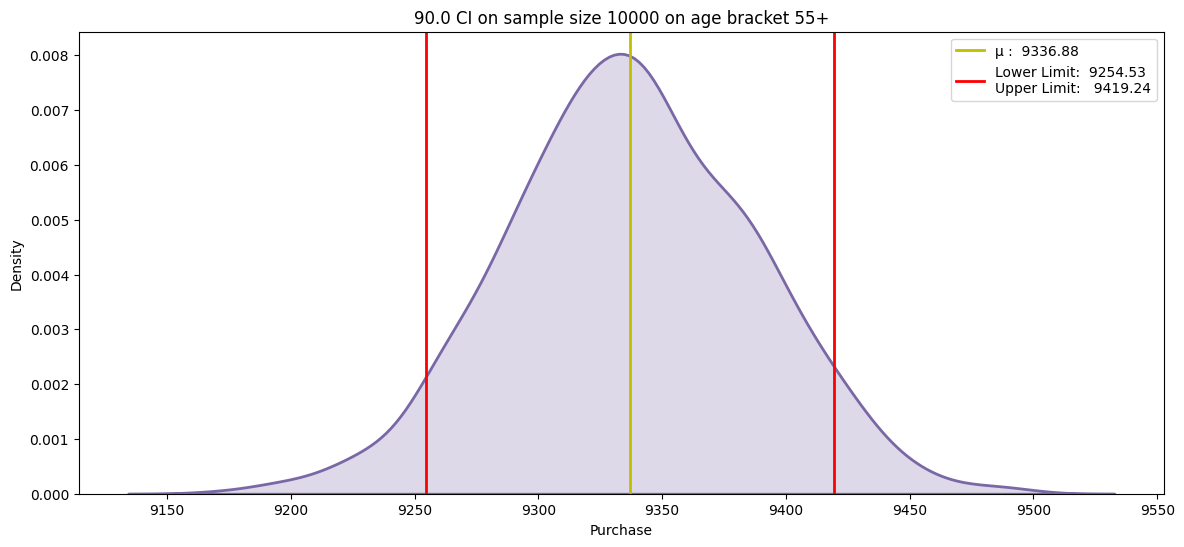

In [ ]:
itr_size = 1000
smp_size = 10000
ci = 0.90
age_list =['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

array = np.empty((0,7))

for age in age_list:
    mean, ll_m, ul_m = bootstrapping_age(walmart_data[walmart_data['Age'] == age]['Purchase'],smp_size,itr_size,ci, age)

    array = np.append(array, np.array([[age, np.round(mean,2), ll_m, ul_m, smp_size,(ul_m-ll_m),90]]), axis=0)

age_data_90 = pd.DataFrame(array, columns = ['Age','Mean','Lower_limit','Upper_limit','Sample_Size','Range','Confidence_pct'])

**Calculating 95% CI**

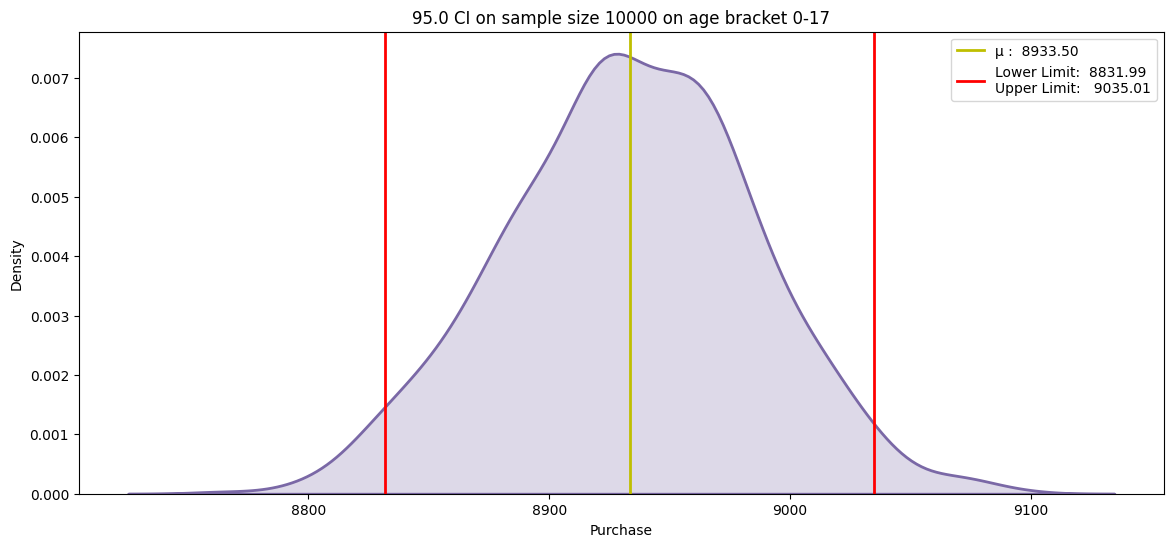

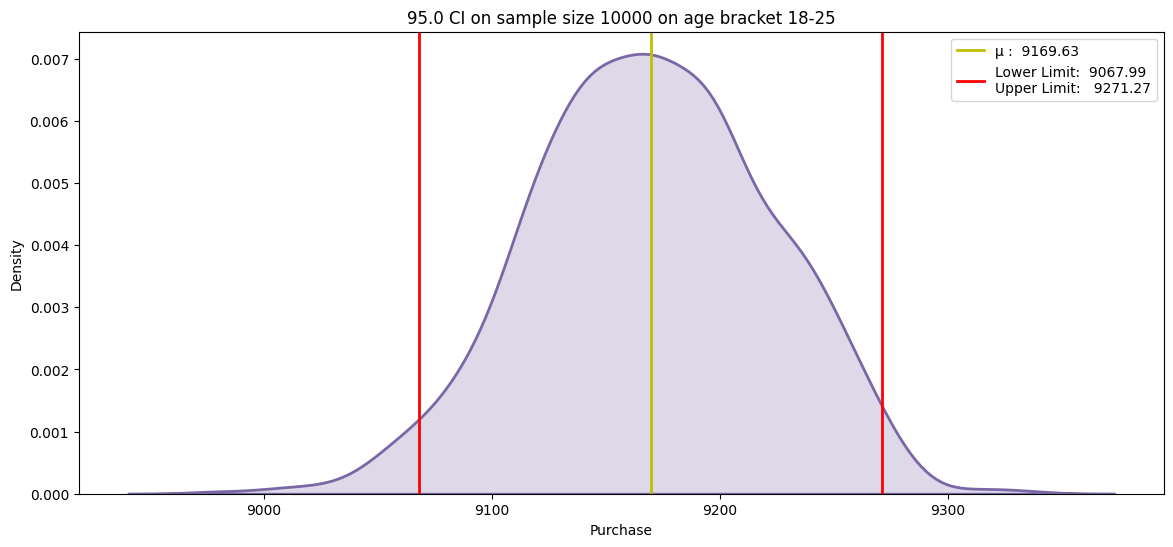

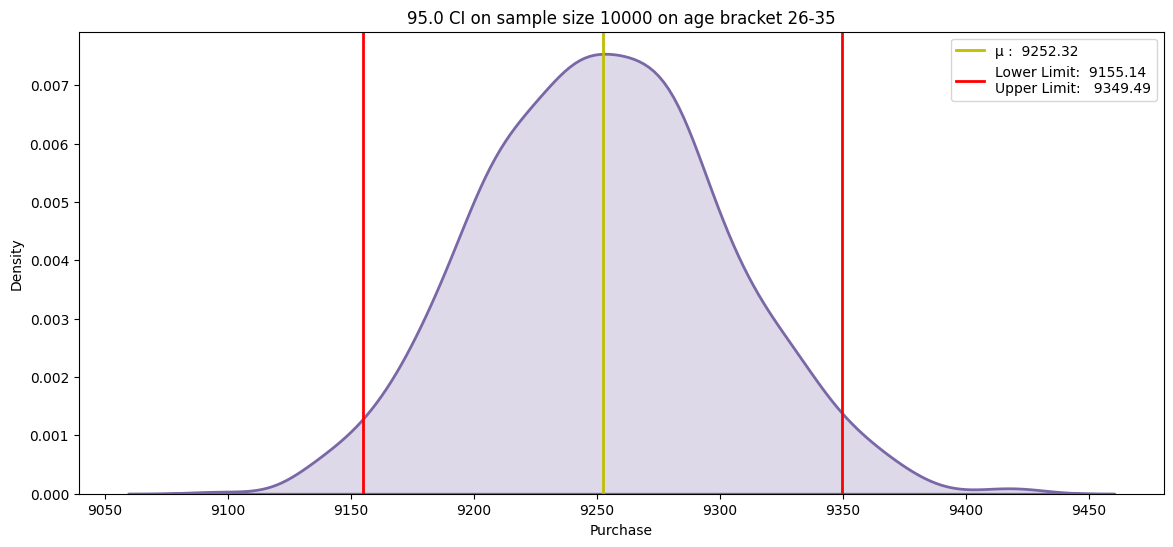

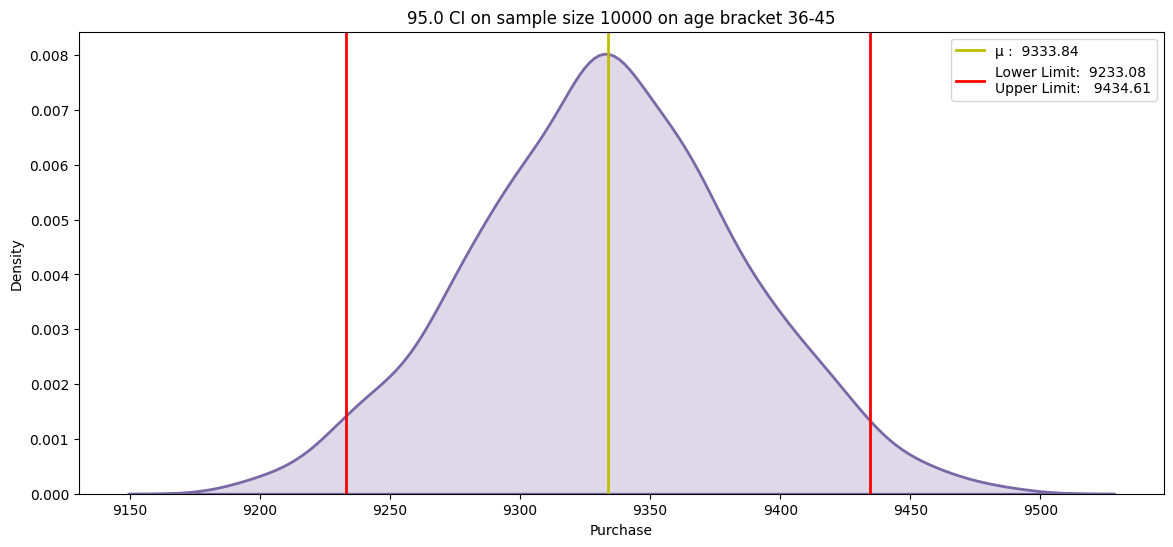

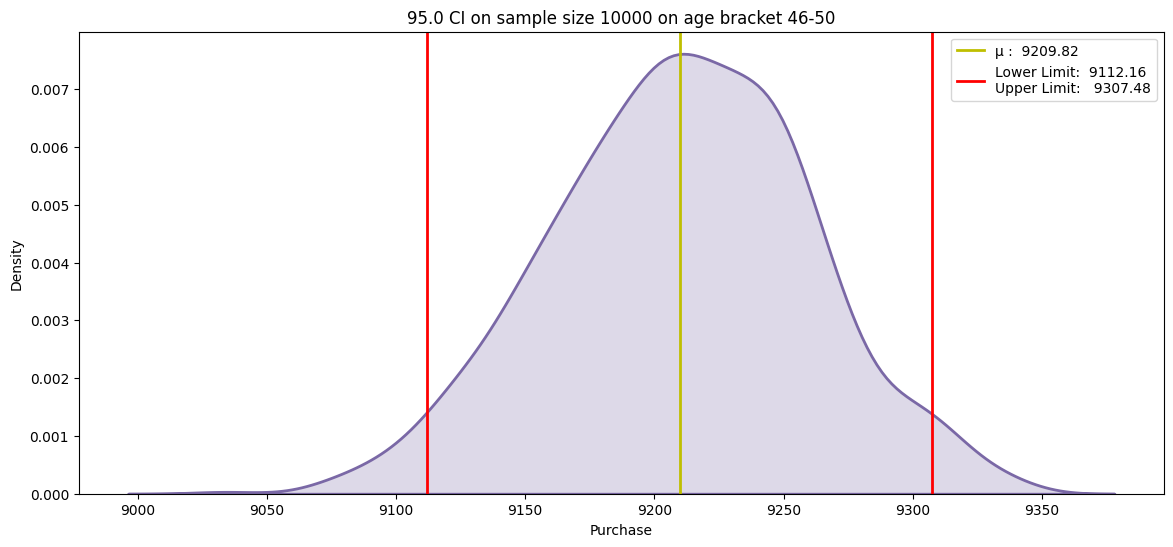

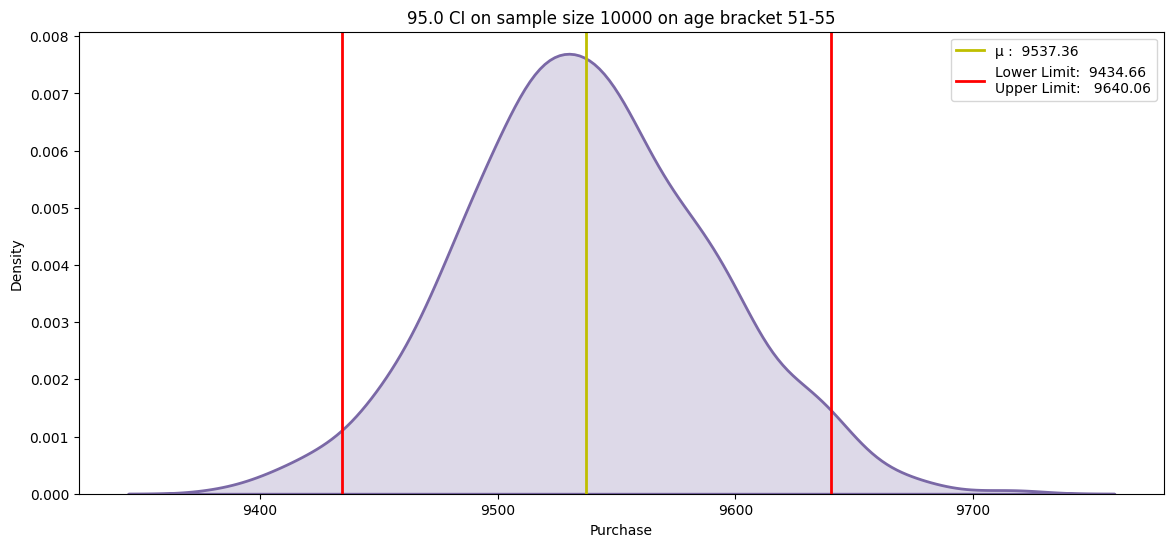

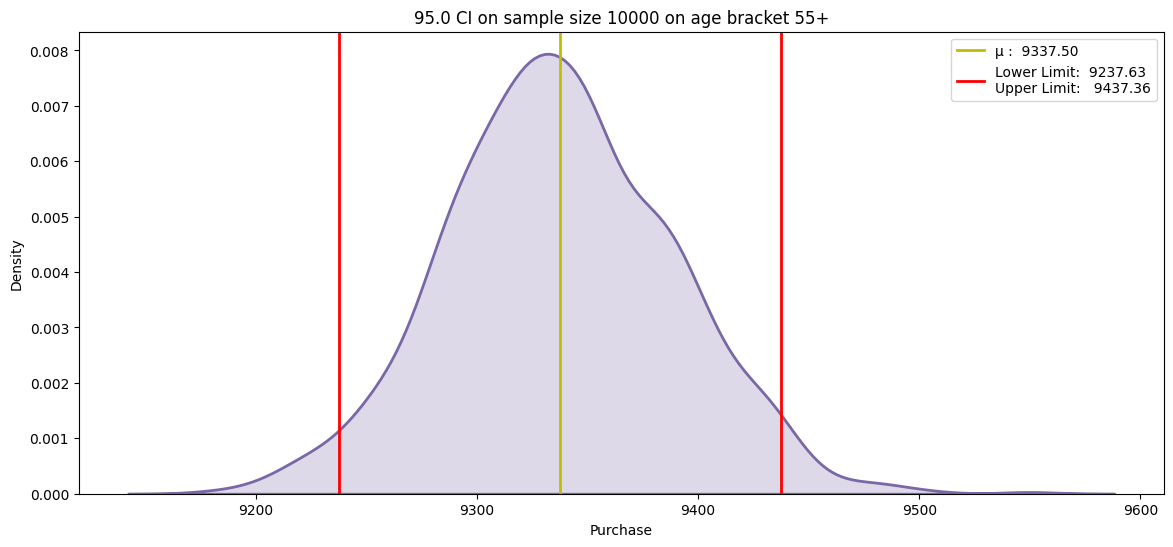

In [ ]:
itr_size = 1000
smp_size = 10000
ci = 0.95
age_list =['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

array = np.empty((0,7))

for age in age_list:
    mean, ll_m, ul_m = bootstrapping_age(walmart_data[walmart_data['Age'] == age]['Purchase'],smp_size,itr_size,ci, age)

    array = np.append(array, np.array([[age,np.round(mean,2), ll_m, ul_m, smp_size,(ul_m-ll_m),95]]), axis=0)

age_data_95 = pd.DataFrame(array, columns = ['Age','Mean','Lower_limit','Upper_limit','Sample_Size','Range','Confidence_pct'])

**Calculating 99% CI**

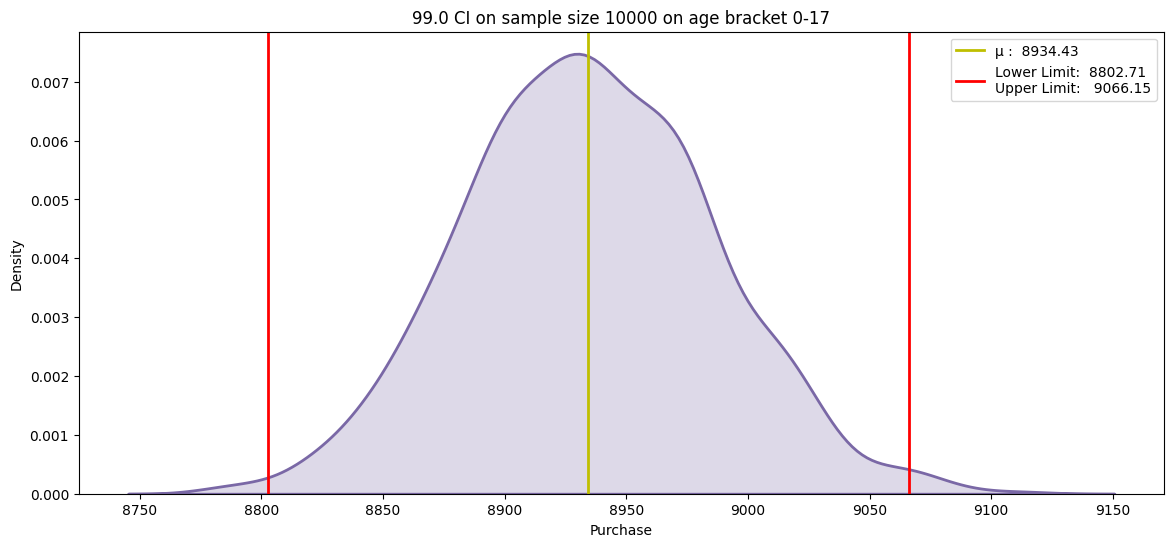

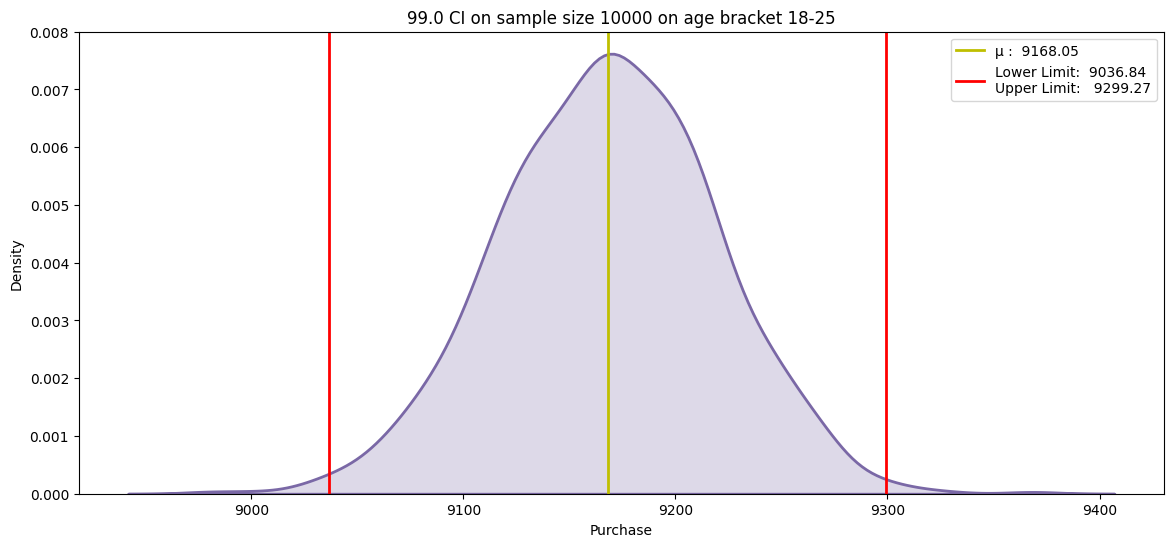

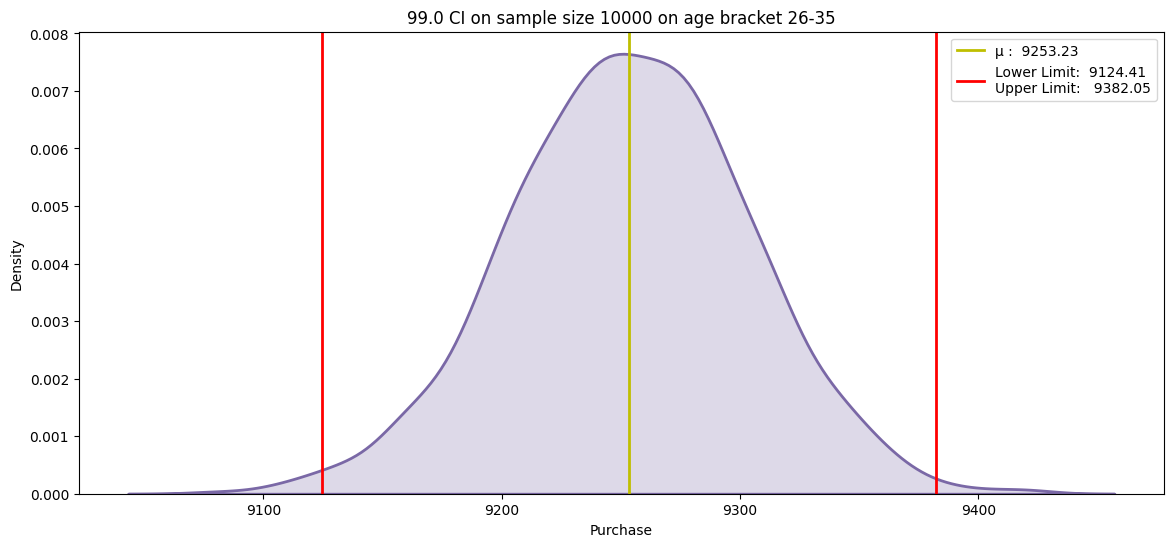

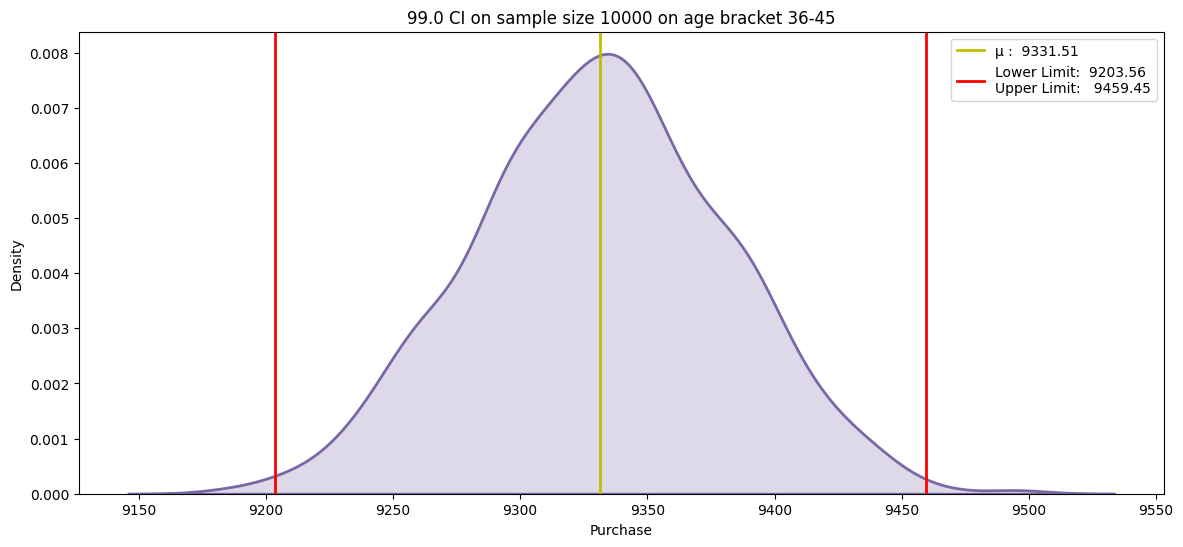

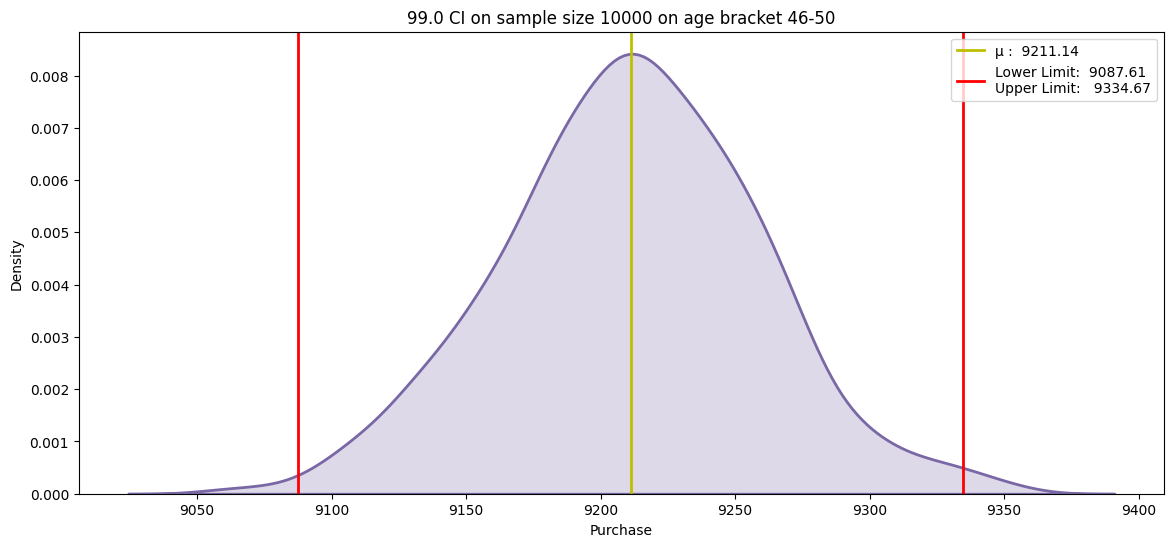

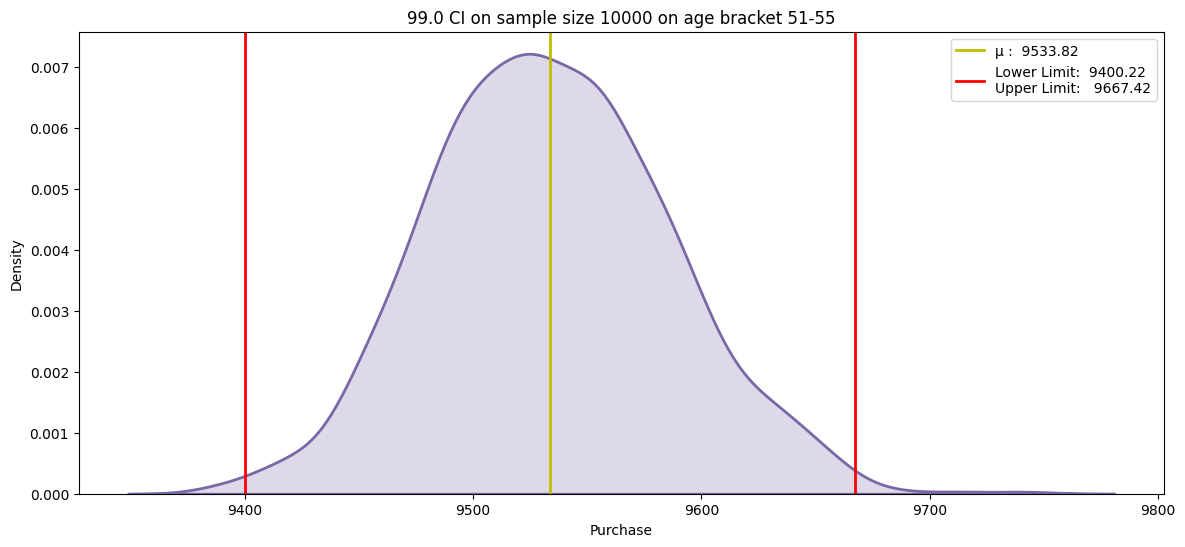

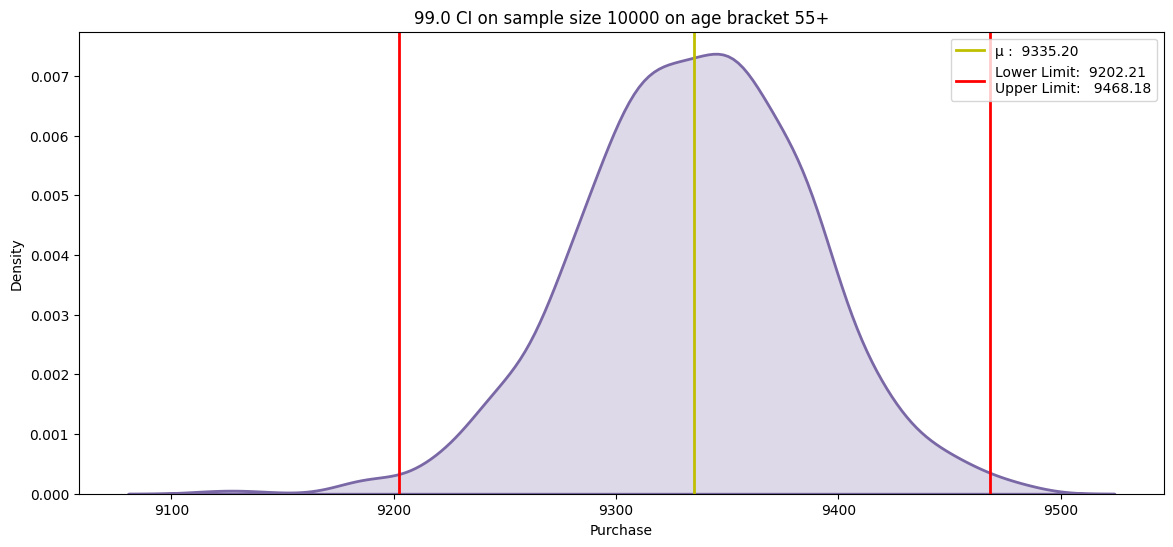

In [ ]:
itr_size = 1000
smp_size = 10000
ci = 0.99
age_list =['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

array = np.empty((0,7))

for age in age_list:
    mean, ll_m, ul_m = bootstrapping_age(walmart_data[walmart_data['Age'] == age]['Purchase'],smp_size,itr_size,ci, age)

    array = np.append(array, np.array([[age,np.round(mean,2), ll_m, ul_m, smp_size,(ul_m-ll_m),99]]), axis=0)

age_data_99 = pd.DataFrame(array, columns = ['Age','Mean','Lower_limit','Upper_limit','Sample_Size','Range','Confidence_pct'])

In [ ]:
age_data_90

Age     Mean Lower_limit Upper_limit Sample_Size               Range  \
0   0-17  8933.98     8847.83     9020.13       10000  172.29999999999927   
1  18-25  9166.91      9083.7     9250.11       10000  166.40999999999985   
2  26-35  9250.32     9167.44     9333.21       10000  165.76999999999862   
3  36-45  9334.12      9253.1     9415.13       10000  162.02999999999884   
4  46-50  9206.22     9123.87     9288.57       10000   164.6999999999989   
5  51-55  9535.39     9451.06     9619.72       10000  168.65999999999985   
6    55+  9336.88     9254.53     9419.24       10000  164.70999999999913   

  Confidence_pct  
0             90  
1             90  
2             90  
3             90  
4             90  
5             90  
6             90

In [ ]:
age_data_95

Age     Mean Lower_limit Upper_limit Sample_Size               Range  \
0   0-17   8933.5     8831.99     9035.01       10000  203.02000000000044   
1  18-25  9169.63     9067.99     9271.27       10000  203.28000000000065   
2  26-35  9252.32     9155.14     9349.49       10000  194.35000000000036   
3  36-45  9333.84     9233.08     9434.61       10000  201.53000000000065   
4  46-50  9209.82     9112.16     9307.48       10000   195.3199999999997   
5  51-55  9537.36     9434.66     9640.06       10000  205.39999999999964   
6    55+   9337.5     9237.63     9437.36       10000  199.73000000000138   

  Confidence_pct  
0             95  
1             95  
2             95  
3             95  
4             95  
5             95  
6             95

In [ ]:
age_data_99

Age     Mean Lower_limit Upper_limit Sample_Size               Range  \
0   0-17  8934.43     8802.71     9066.15       10000   263.4400000000005   
1  18-25  9168.05     9036.84     9299.27       10000   262.4300000000003   
2  26-35  9253.23     9124.41     9382.05       10000   257.6399999999994   
3  36-45  9331.51     9203.56     9459.45       10000  255.89000000000124   
4  46-50  9211.14     9087.61     9334.67       10000   247.0599999999995   
5  51-55  9533.82     9400.22     9667.42       10000   267.2000000000007   
6    55+   9335.2     9202.21     9468.18       10000  265.97000000000116   

  Confidence_pct  
0             99  
1             99  
2             99  
3             99  
4             99  
5             99  
6             99

# **Insights**

Customers in the 51-55 age group have the highest average purchase amount (mean) across all confidence intervals (CI) - 90%, 95%, and 99%. This indicates that, on average, customers in this age group tend to spend the most.

Customer groups 55+ and 36-45 also show relatively high average spending compared to other age groups based on CI means. This suggests a trend of potentially higher spending as customers reach mid-life.

The 0-17 age group has the lowest average purchase amount, likely due to factors like limited financial independence. The 26-35 age group, despite having more potential spending power than the 0-17 group, also shows a lower average purchase amount. This could be due to various reasons like student loans, starting careers, or different spending priorities.

# **Recommendations**

Customer Research: Conduct surveys or focus groups to understand the reasons behind the spending gap. Is it product preference, income disparity, or something else?

Targeted Surveys: Conduct surveys specific to male and female customers to understand their buying motivations, brand preferences. This can help identify areas where your offerings or messaging might not be resonating with women.

Create content (blog posts, social media posts, videos) targeted towards women. Address their challenges and interests, showcasing how your products or services can add value to their lives. Use female models or influencers when appropriate.

Implement strategies to retain both male and female customers. This could include loyalty programs, personalized communication, and exceptional customer service.

Brand Building: Focus on building a strong brand identity that appeals to both men and women. Highlight brand values that resonate with a diverse audience.